# ===============HOUSING: PRICE PREDICTION================

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house

# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#reading the train dataset
df=pd.read_csv("https://raw.githubusercontent.com/ROKR7381/data_trained-project_only/main/train_dataset.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
#check dimensions of data
df.shape

(1168, 81)

#### The dataset contains 1168 rows and 81 features

In [4]:
# checking data type of all features
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
#check how many features have null values in it
df.isnull().any().sum()

18

In [6]:
#data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

#### There are null values in :
   * LotFrontage
   * Alley
   * MasVnrType
   * MasVnrArea
   * BsmtQual 
   * BsmtCond
   * BsmtExposure 
   * BsmtFinType1
   * BsmtFinType2 
   * FireplaceQu 
   * GarageType     
   * GarageYrBlt   
   * GarageFinish   
   * GarageQual     
   * GarageCond    
   * PoolQC       
   * Fence         
   * MiscFeature   

#### features with int data-type:
   * Id  
   * MSSubClass   
   * LotArea        
   * OverallQual 
   * OverallCond   
   * YearBuilt     
   * YearRemodAdd  
   * BsmtFinSF1    
   * BsmtFinSF2   
   * BsmtUnfSF     
   * TotalBsmtSF 
   * 1stFlrSF      
   * 2ndFlrSF    
   * LowQualFinSF  
   * GrLivArea   
   * BsmtFullBath 
   * BsmtHalfBath  
   * FullBath   
   * HalfBath   
   * BedroomAbvGr 
   * KitchenAbvGr  
   * TotRmsAbvGrd  
   * Fireplaces   
   * GarageCars  
   * GarageArea  
   * WoodDeckSF     
   * OpenPorchSF    
   * EnclosedPorch  
   * 3SsnPorch      
   * ScreenPorch
   * PoolArea 
   * Mosold 
   * YrSold
   * MiscalVal
   * Sale price

####  Features with float data type
   * LotFrontage
   * MasVnrArea  
   * GarageYrBlt

Rest of the columns are object type

In [7]:
#checking the unique values in each feature
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [8]:
#Let us drop the "Id" column as it is unique for all.
df.drop(columns=['Id'],axis=1,inplace=True)
df.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
798,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,314813


### Treating null values in the dataset

In [9]:
#checking the number of null values in alley
df.Alley.isnull().sum()

1091

In [10]:
#non null values in alley
df.Alley.notnull().sum()

77

In [11]:
# percentage of null values=(1091/1168)*100
print("percentage of null values in 'Alley' =",(1091/1168)*100)

percentage of null values in 'Alley' = 93.40753424657534


#### As there are 1091 null values which are more than 93% we shall drop this feature instead of imputing any values.

In [12]:
#dropping the alley column
df.drop(columns=['Alley'],axis=1,inplace=True)
df.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
400,20,RL,80.0,10197,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,6,2008,COD,Normal,163000


### Handling null values in "PoolQC"

In [13]:
#checking the number of null values in poolqc
print("number of null values=", df.PoolQC.isnull().sum())
#non null values in poolqc
print("number of non-null values=", df.PoolQC.notnull().sum())

number of null values= 1161
number of non-null values= 7


In [14]:
# percentage of null values
print("percentage of null values in 'PoolQC' =",(1161/1168)*100)

percentage of null values in 'PoolQC' = 99.40068493150685


#### Thus there are 1161 null values which are more than 99% hence we shall drop this feature instead of imputing any values as imputing any values won't improve the model.

In [15]:
#dropping the poolqc column
df.drop(columns=['PoolQC'],axis=1,inplace=True)
df.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
806,20,RL,NaN,13526,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,MnPrv,NaN,0,11,2006,WD,Normal,137000


### 'LotFrontage'

In [16]:
#replacing the nan values with median 
impute = SimpleImputer(missing_values=np.nan, strategy='median')
df['LotFrontage']=impute.fit_transform((df['LotFrontage'].values.reshape(-1, 1)))

df['LotFrontage'].isnull().sum()


0

#### handling null values in 'GarageYrBlt'

In [17]:
#instantiate simple impute and use mode/most frequent method
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['GarageYrBlt']=imp.fit_transform((df['GarageYrBlt'].values.reshape(-1, 1)))

#check if the null values are replaced:
df['GarageYrBlt'].isnull().sum()

0

#### Null values in "MasVnrArea"

In [18]:
print("Number of null values in MasVnrArea=",df.MasVnrArea.isnull().sum())
print("\n")
print("value count of each unique value=\n",df['MasVnrArea'].value_counts())
print("\n")
print("Mode of this column=",df['MasVnrArea'].mode())

Number of null values in MasVnrArea= 7


value count of each unique value=
 0.0      692
72.0       7
120.0      6
180.0      6
106.0      5
        ... 
223.0      1
115.0      1
88.0       1
31.0       1
415.0      1
Name: MasVnrArea, Length: 283, dtype: int64


Mode of this column= 0    0.0
dtype: float64


#### There are 7 null values in the column and if we wish to impute this null values with mode i.e 0 we shall get total 699 values with zeros which says that more than 59% values are 0 which are not giving information and are of no use  hence we can drop it 


In [19]:
df.drop(columns=['MasVnrArea'],axis=1,inplace=True)
df.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1165,160,RL,24.0,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,0,7,2009,WD,Normal,148500


#### For the null values in 'object' data type we will assign a seperate class to each column according to the description given in file (data description)


In [20]:

df['MasVnrType']=df['MasVnrType'].fillna('None')
df['BsmtQual']=df['BsmtQual'].fillna('No Basement')
df['BsmtCond']=df['BsmtCond'].fillna('No Basement')
df['BsmtExposure']=df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('No Basement')
df['FireplaceQu']=df['FireplaceQu'].fillna('No Fire place')
df['GarageType']=df['GarageType'].fillna('No garage')
df['GarageFinish']=df['GarageFinish'].fillna('No garage')
df['GarageQual']=df['GarageQual'].fillna('No garage')
df['GarageCond']=df['GarageCond'].fillna('No garage')
df['Fence']=df['Fence'].fillna('No fence')
df['MiscFeature']=df['MiscFeature'].fillna('None')

In [21]:
#check if there are any null values in the dataset
df.isnull().any().sum()

0

In [22]:
df.isnull().sum().any()

False

In [23]:
#print unique values and there count in each column
for cols in df.columns:
    if df[cols].dtypes=='object':
        print(str(cols)+ ':' + str(df[cols].unique()))
        print(df[cols].value_counts())
        print("***************************************************")
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
***************************************************


Street:['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64
***************************************************


LotShape:['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
***************************************************


LandContour:['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
***************************************************


Utilities:['AllPub']
AllPub    1168
Name: Utilities, dtype: int64
***************************************************


LotConfig:['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
***************************************************


LandSl

### DataType Conversions:

In [24]:
#converting float columns into integer datatype
df['GarageYrBlt']=df['GarageYrBlt'].astype('int64')
df['LotFrontage']=df['LotFrontage'].astype('int64')

In [25]:
#checking unique values in MoSold and YrSold
print("Number of unique values in month sold=",df['MoSold'].nunique())
print("Number of unique values in year sold=",df['YrSold'].nunique())
#checking unique values in Mssubclass,overallqual and overall cond
print("Number of unique values in MSSubClass=",df['MSSubClass'].nunique())
print("Number of unique values in overall quality=",df['OverallQual'].nunique())
print("Number of unique values in overall condition=",df['OverallCond'].nunique())

Number of unique values in month sold= 12
Number of unique values in year sold= 5
Number of unique values in MSSubClass= 15
Number of unique values in overall quality= 10
Number of unique values in overall condition= 9


#### As the number of unique values in each column in less we shall convert them into categorical/object data type

In [26]:
df['MoSold']=df['MoSold'].astype('object')
df['YrSold']=df['YrSold'].astype('object')
df['MSSubClass']=df['MSSubClass'].astype('object')
df['OverallQual']=df['OverallQual'].astype('object')
df['OverallCond']=df['OverallCond'].astype('object')

### Visualizations

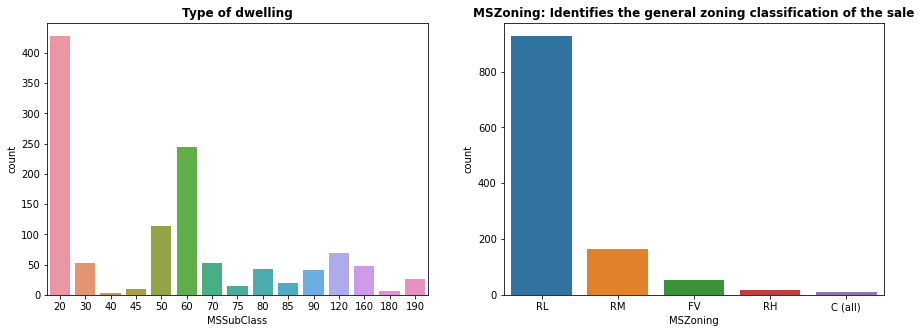

In [27]:
#plotting the count plot for MSSubClass which Identifies the type of dwelling involved in the sale.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df.MSSubClass)
plt.title("Type of dwelling",fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(df['MSZoning'])
plt.title("MSZoning: Identifies the general zoning classification of the sale",fontweight='bold')
plt.show()
#print(df['MSZoning'].value_counts())
plt.show()

#### * The number conventions are as follows:
    * 20:'1-STORY 1946 & NEWER ALL STYLES'
    * 30:'1-STORY 1945 & OLDER'
    * 40:'1-STORY W/FINISHED ATTIC ALL AGES'
    * 45:'1-1/2 STORY - UNFINISHED ALL AGES'
    * 50:'1-1/2 STORY FINISHED ALL AGES'
    * 60:'2-STORY 1946 & NEWER'
    * 70:'2-STORY 1945 & OLDER'
    * 75:'2-1/2 STORY ALL AGES'
    * 80:'SPLIT OR MULTI-LEVEL'
    * 85:'SPLIT FOYER'
    * 90:'DUPLEX - ALL STYLES AND AGES'
    * 120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
    * 150:'1-1/2 STORY PUD - ALL AGES'
    * 160:'2-STORY PUD - 1946 & NEWER'
    * 180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
    * 190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'


#### Observations for type of dwelling

* The highest number of records could be seen for 20 which is '1-STORY 1946 & NEWER ALL STYLES'
* 60:'2-STORY 1946 & NEWER' had the second highest records
* 50:'1-1/2 STORY FINISHED ALL AGES' had the third largest records
* 40:'1-STORY W/FINISHED ATTIC ALL AGES' , 45:'1-1/2 STORY - UNFINISHED ALL AGES' and 180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER' had the least records 


#### Observation for Ms zoning:
* The highest amount of dwelling were in "RL"i.e resedential low density
* Commercial(C) and RH( resedential high density) were very few
* After RL, RM(residential medium density) was most seen


### LotFrontage and LotArea

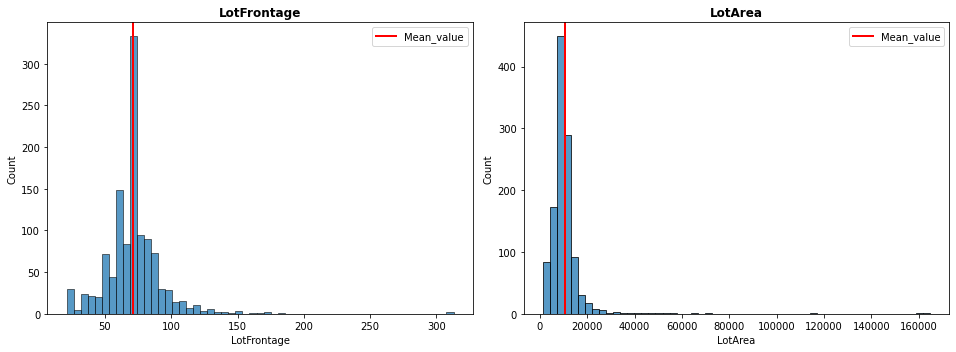

In [28]:
lot_list=['LotFrontage','LotArea']
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,5))
for i in lot_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.histplot(df[i],bins=55)
    mean_val=np.mean(df[i])
    plt.axvline(mean_val,linewidth=2,color='red',label='Mean_value')
    plt.legend()
    c = c + 1
    plt.tight_layout()
    #plt.ylabel("Count")
plt.show()

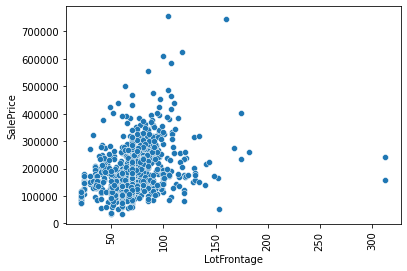

In [29]:
sns.scatterplot(y = "SalePrice", x = "LotFrontage", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Observations (Linear feet of street connected to property):
    
* Mean value of LotFrontage could be seen as 70 the ,the maximum LotFrontage was 313 while the minimum could be seen as 25.

*  Mean value of LotFrontage was 10484 ,the maximum LotArea was 164660 while the minimum could be seen as 1300.


### LotShape:General shape of property and LotConfig :Lot configuration

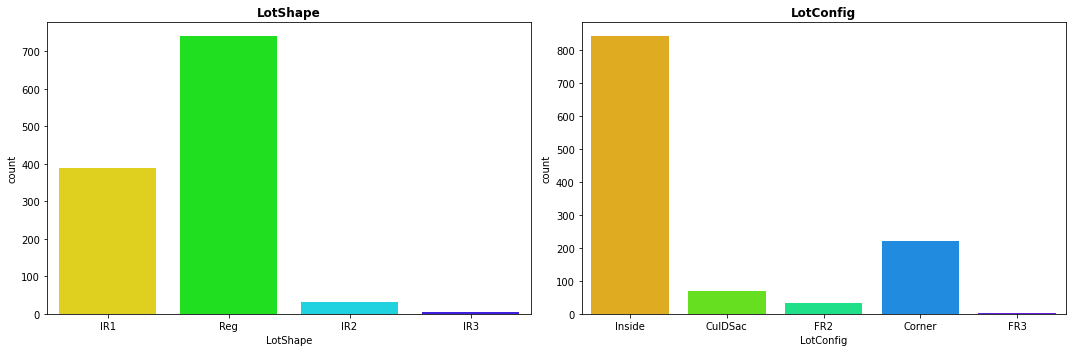

In [30]:
lot_list2=['LotShape','LotConfig']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,5))
for i in lot_list2: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.countplot(df[i],palette='gist_rainbow')
    c = c + 1
    plt.tight_layout()
    #plt.ylabel("Count")
plt.show()

#### Observations for LotShape:

* maximum number of properties had Regular(reg) shape
* IR1 i.e Slightly irregular properties were second highest
* IR2 i.e Moderately Irregular properties also had few records
* IR3 i.e Irregular were very few in number

#### Observations for LotConfig
* properties with inside lot were the highest while the properties with frontage on 3 sides of the property were minimum.
* Corner lot were second highest
* cul-de-sac properties were moderate in number 

### LandCountour:Flatness of the property and LandSlope:Slope of property

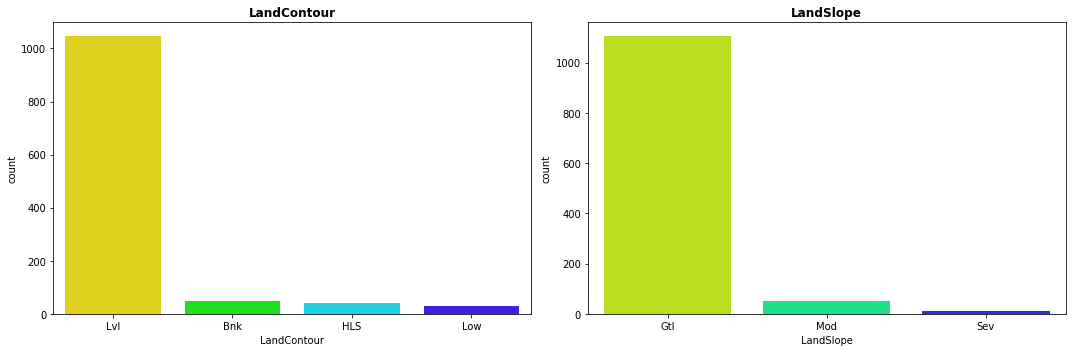

In [31]:
land_list=['LandContour','LandSlope']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,5))
for i in land_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.countplot(df[i],palette='gist_rainbow')
    c = c + 1
    plt.tight_layout()
plt.show()

#### Observations for LandCountour
* Most of the properties had Near/flat level 
* properties with Bnk(Banked - Quick and significant rise from street grade to building),HLS(Hillside - Significant slope from side to side) and Low(Depression) were similar in number which was very low as compared to flat countours

#### Observations for LandSlope:
* Gtl i.e.Gentle slope were the maximum 
* Mod i.e Moderate Slope had few records
* very few properties had Severe Slope (Sev)

### Bivariate analysis between LandContour and Landslope

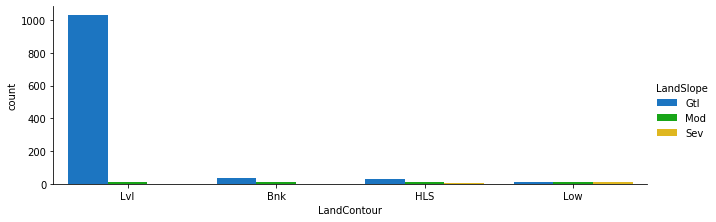

LandContour  LandSlope
Bnk          Gtl            36
             Mod            13
             Sev             1
HLS          Gtl            27
             Mod            13
             Sev             2
Low          Mod            13
             Gtl             9
             Sev             8
Lvl          Gtl          1033
             Mod            12
             Sev             1
Name: LandSlope, dtype: int64


In [32]:
#landslope and landcountour
sns.catplot(x='LandContour',kind="count",hue="LandSlope",palette='nipy_spectral', data=df,height=3,aspect=3)
plt.show()

print(df.groupby('LandContour')["LandSlope"].value_counts())


#### Observations:
* For flat land contour most of the properties had gentle slope
* for depressed land the number of Gtl,Mod and sev were almost same
* for Banked - (Quick and significant rise from street grade to building) and Lvl only 1 propert had severe slope
* Therefore most of the general slope properties were build on flat land 
* properties with moderate slope were equal in all kind of land contours (13,13,13,12)
* severe slope properties couold be mostly seen in depression land contour.


### Street: Type of road access to property

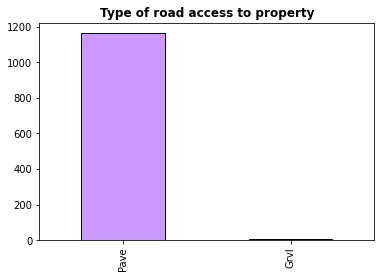

Pave    1164
Grvl       4
Name: Street, dtype: int64


In [33]:
#street
df['Street'].value_counts().plot(kind='bar',color= ['#cc99ff','green'],
                                       edgecolor='black')
plt.title("Type of road access to property",fontweight='bold')
plt.show()
print(df.Street.value_counts())

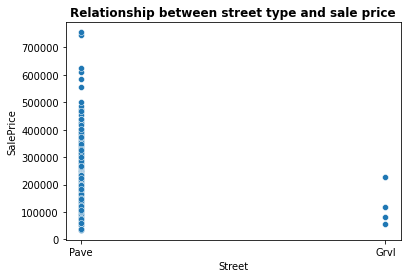

In [34]:
sns.scatterplot(x='Street',y='SalePrice',data=df)
plt.title("Relationship between street type and sale price",fontweight='bold')
plt.show()

#### Observation:
* Only 4 properties had Gravel type of road access to property.
* 1164 properties had paved road access 
* Properties with paved street had higher sale prices

### Utilities: Type of utilities available and Neighborhood: Physical locations within Ames city limits


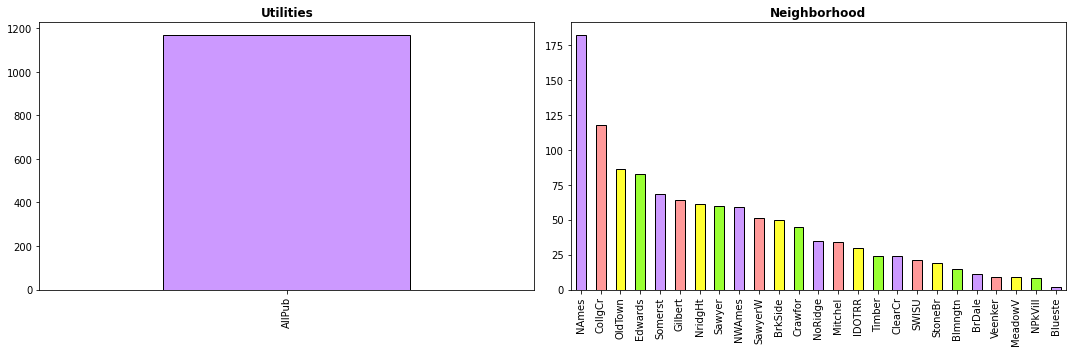

Value count of Neighborhood:

 NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


In [35]:
list3=['Utilities','Neighborhood']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,5))
for i in list3: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#cc99ff','#ff9999','#ffff33','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
print("Value count of Neighborhood:")
print("\n",df.Neighborhood.value_counts())

#### Observations:
* All the properties had ALlpub utilities which includes Electricity,gas,water and septic tank.
* Most of properties had North Ames and college Creek as its neighborhood 
* properties having Meadow and veenker as its neighbors were same in number =9
* ClearCr and Timber also had same number of properties in Neighborhood 
* Bluestem had the least records

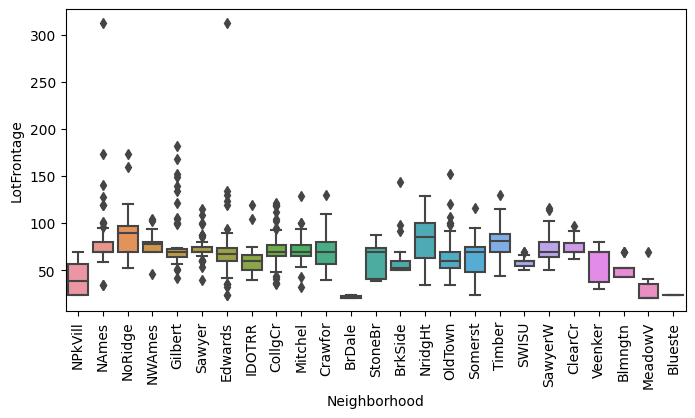

In [36]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(x = "Neighborhood", y = "LotFrontage", data = df)
plt.xticks(rotation = 90)
plt.show()

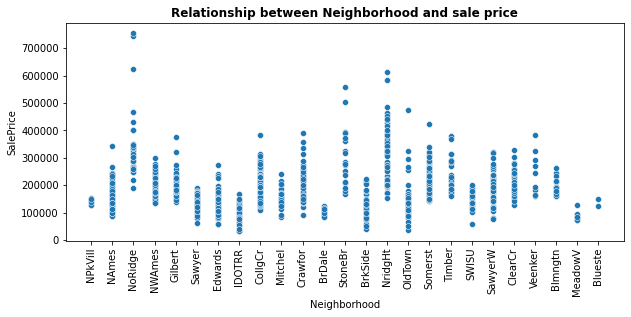

In [37]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Neighborhood',y='SalePrice',data=df)
plt.title("Relationship between Neighborhood and sale price",fontweight='bold')
plt.xticks(rotation=90)
plt.show()

#### observations:
* NoRidge had the highest sale prices 
* NPKVil ,Blueste, BrDale and Meadow areas had less sale prices

### Condition1: Proximity to various conditions and Condition2: Proximity to various conditions (if more than one is present)

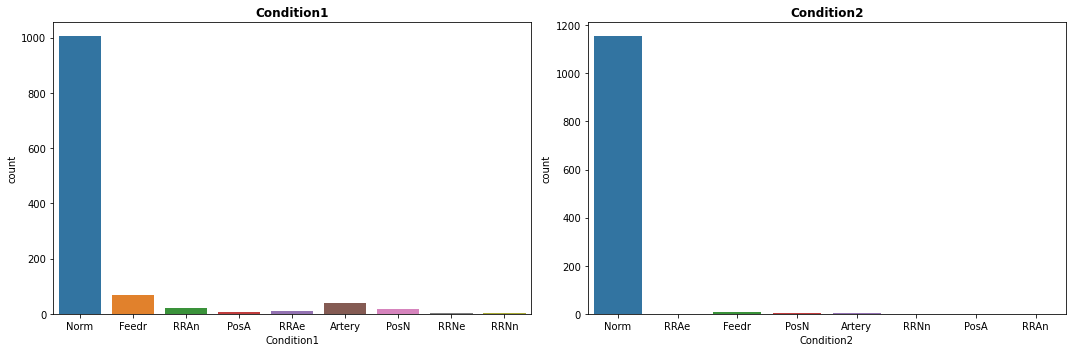

In [38]:
condition_list=['Condition1','Condition2']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,5))
for i in condition_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.countplot(df[i],palette='tab10')
    c = c + 1
    plt.tight_layout()
plt.show()


#### Observations:
* most of properties had Normal Proximity to various conditions

### BldgType: Type of dwelling and HouseStyle: Style of dwelling

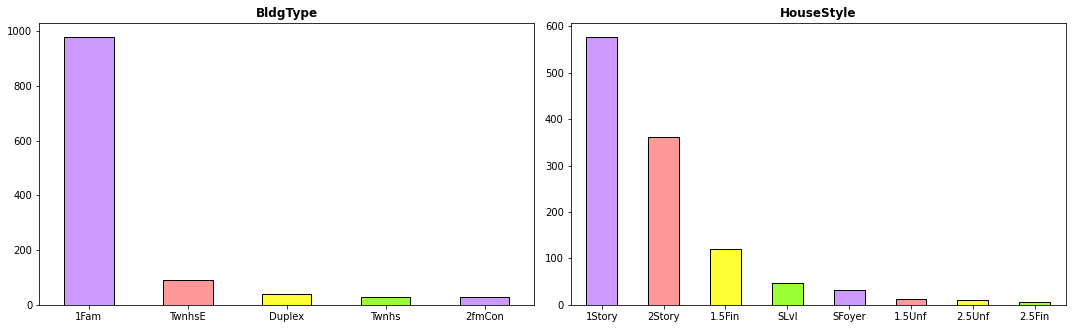

In [39]:
list4=['BldgType', 'HouseStyle']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,5))
for i in list4: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#cc99ff','#ff9999','#ffff33','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
plt.show()

#### Observations for BldgType: Type of dwelling
* 1Fam(Single-family Detached) were maximum
* 2FmCon i.e Two-family Conversion; originally built as one-family dwelling and "TwnhsI Townhouse Inside Unit"were minimum
* TwnhsE	Townhouse End Unit were second highest

#### observation for HouseStyle: Style of dwelling
* 1 Story i.e One story were the highest in number
* 2 story houses were scond highest followed by 1.5Fin i.e One and one-half story
* 2.5 Fin which is Two and one-half story: 2nd level finished were the least

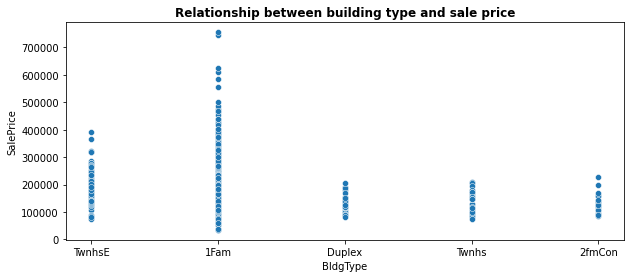

In [40]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='BldgType',y='SalePrice',data=df)
plt.title("Relationship between building type and sale price",fontweight='bold')
plt.show()

### OverallQual: Rates the overall material and finish of the house and OverallCond: Rates the overall condition of the house

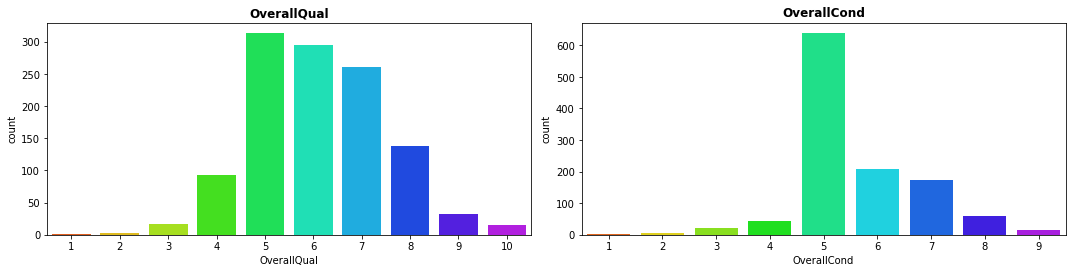

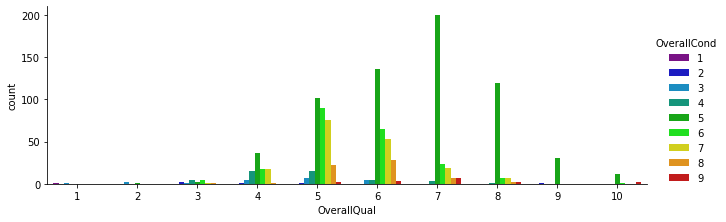

In [41]:
Qual_list=['OverallQual', 'OverallCond']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in Qual_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.countplot(df[i],palette='gist_rainbow')
    c = c + 1
    plt.tight_layout()
plt.show()
sns.catplot(x='OverallQual',kind="count",hue="OverallCond",palette='nipy_spectral', data=df,height=3,aspect=3)
plt.show()
#print(df.groupby('OverallQual')["OverallCond"].value_counts())

#### Observations:
    
* We can see the highest records by 5 and 6 which defines average and above average for both the overall material and finish of the house and the overall condition of the house.
* very few properties were rated very poor,poor and fair 


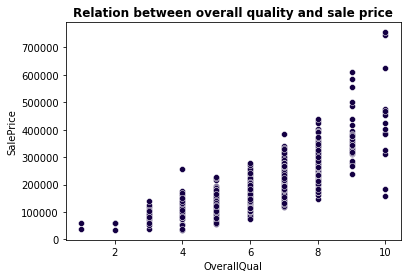

In [42]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df,color='#140043')
plt.title("Relation between overall quality and sale price",fontweight='bold')
plt.show()

#### Observation:
* As the quality and finish is good the sale prices are high
* For low quality the sale price is low.
* For (10) i.e excellent overall quality the sale prices were maximum,few as high as 700000


### YearBuilt: Original construction date and YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

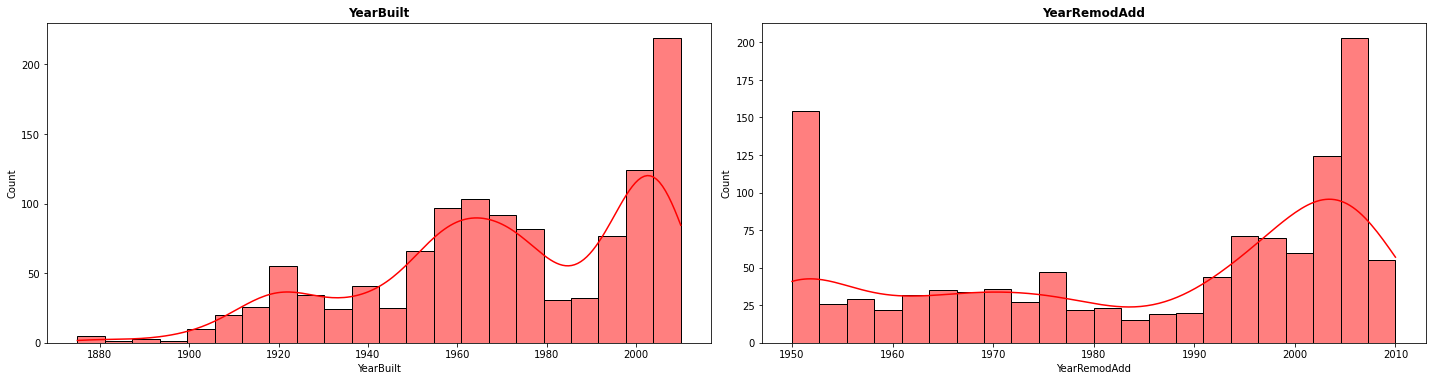

value counts:
 YearBuilt  YearRemodAdd
2006       2006            40
2007       2007            29
2005       2005            25
           2006            23
1976       1976            20
                           ..
1942       1950             1
1941       2006             1
1940       2000             1
           1999             1
2010       2010             1
Length: 364, dtype: int64


In [43]:
yr_list=['YearBuilt', 'YearRemodAdd']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,10))
for i in yr_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.histplot(df[i],color='red',kde=True,bins=int(180/8))
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
plt.show()
print("value counts:\n",df[['YearBuilt', 'YearRemodAdd']].value_counts())


#### Observations
* Most of the houses that were buitl in 2006 and 2007 and were not remodeled
* Most of the properties were built during 2003 to 2006
* For modeled properties the density was highest for 1950 and then between 2004 to 2006


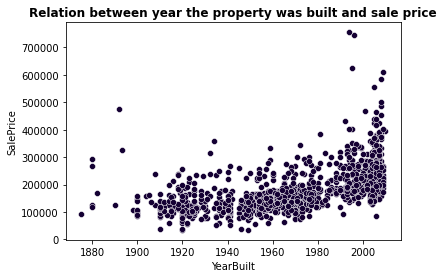

In [44]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=df,color='#140033')
plt.title("Relation between year the property was built and sale price",fontweight='bold')
plt.show()

### RoofStyle: Type of roof and RoofMatl: Roof material

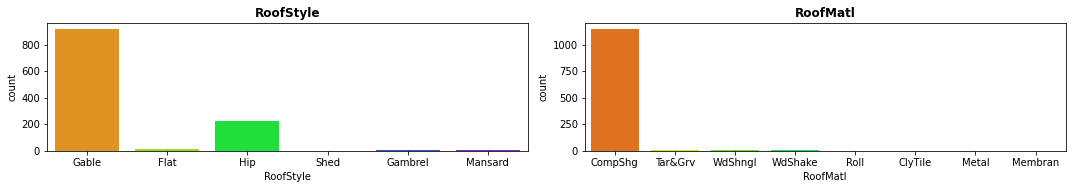

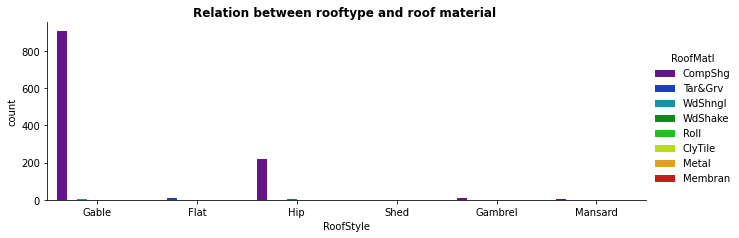

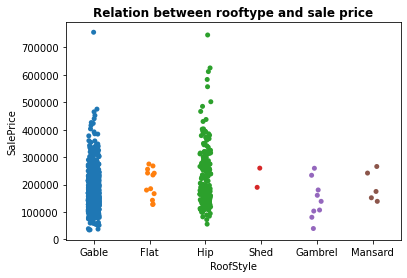

In [45]:
roof_list=['RoofStyle', 'RoofMatl']
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in roof_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.countplot(df[i],palette='gist_rainbow')
    c = c + 1
    plt.tight_layout()
plt.show()
#relation between Roofstyle and roof material
sns.catplot(x='RoofStyle',kind="count",hue='RoofMatl',palette='nipy_spectral', data=df,height=3,aspect=3)
plt.title("Relation between rooftype and roof material ",fontweight='bold')
plt.show()
#relation between Roofstyle and sale price
sns.stripplot(x="RoofStyle", y="SalePrice",data=df)
plt.title("Relation between rooftype and sale price",fontweight='bold')
plt.show()

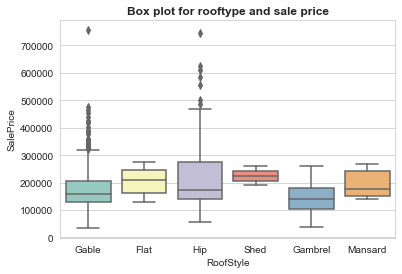

In [46]:
#Box plot for roofstyle and sale price 
sns.set_style("whitegrid")
ax = sns.boxplot(x="RoofStyle", y="SalePrice",data=df, palette="Set3")
plt.title("Box plot for rooftype and sale price",fontweight='bold')
plt.show()

#### Observations:
* Most of the houses had Gable or hip kind of roof 
* CompShg	Standard (Composite) Shingle was used the most for construction of the roofs
* only 1 house roof was made each with Membran ,Metal,Roll and ClyTile material  
* From the bivariate analysis we can see the gable roofs were constructed using standard composite shingle and a very few with Wood Shingles.
* for Gambrel style roofs only CompShg material was used
* Hip roofs used both Compshg and wdshake
* The price of houses with gable roof type were dense in the range from approzimately 50000 to 400000
* Mansard price ranged from  175000 to  265979  
* Shed priced from 190000 to 260000 
* Flat roof prices were from 127500 to 180000
* Outliers could be seen in Gable and Hip kind of roofs 

#### Features related to exterior of the houses
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* ExterQual: Evaluates the quality of the material on the exterior 
* ExterCond: Evaluates the present condition of the material on the exterior

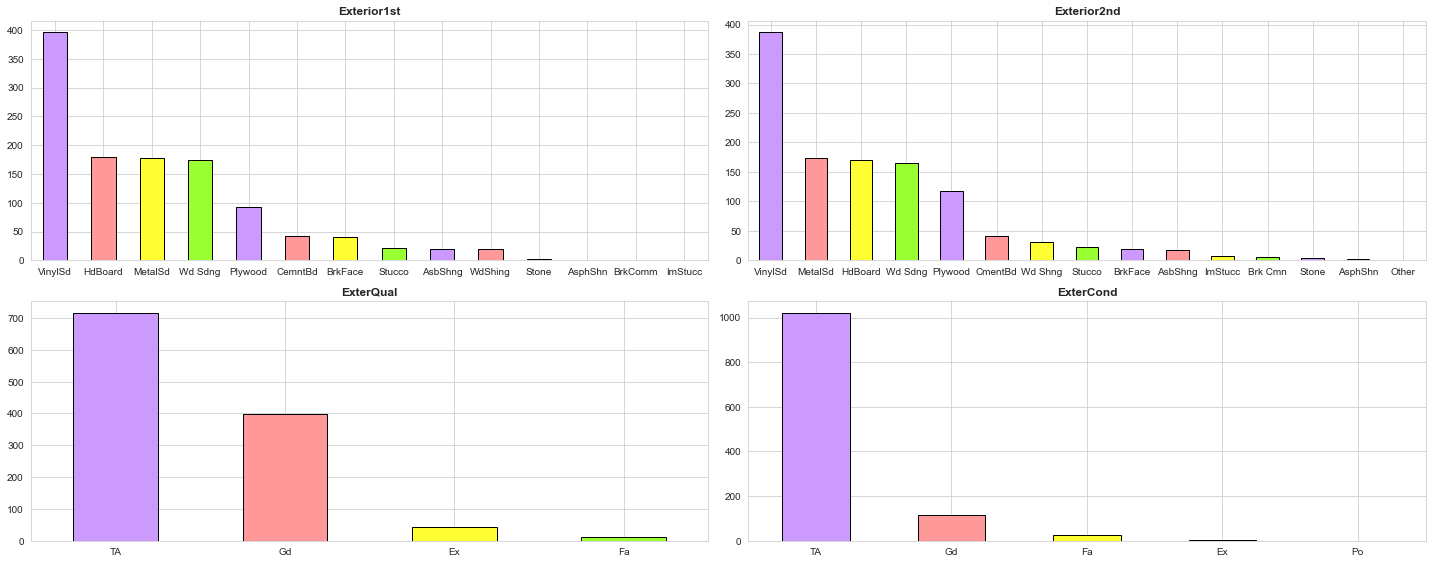

In [47]:
exterior_list=['Exterior1st', 'Exterior2nd','ExterQual','ExterCond']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,8))
for i in exterior_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#cc99ff','#ff9999','#ffff33','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
plt.show()


#### Observations:
    
* for both exterior1st and exterior2nd   VinylSd	Vinyl Siding was the maximum 
* Wd Sdng	Wood Siding ,HdBoard	Hard Board and MetalSd	Metal Siding were seen same in number
* Stone	Stone , AsphShn	Asphalt Shingles, BrkComm	Brick Common exterior covering were the least of all.
* In terms of Exterior quality and the present condition of material most of the houses had TA	Average/Typical and  Gd	Good quality.
* For exterior quality there were no houses in poor condition
* 1 house could be seen in poor (po) state for current condition



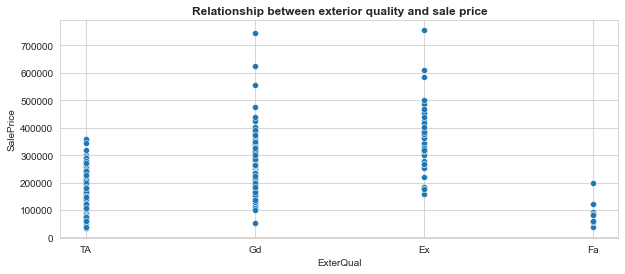

In [48]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='ExterQual',y='SalePrice',data=df)
plt.title("Relationship between exterior quality and sale price",fontweight='bold')
plt.show()

#### observations:
* Sale prices were high for good and excellent exterior quality

### MasVnrType:Masonry veneer area in square feet

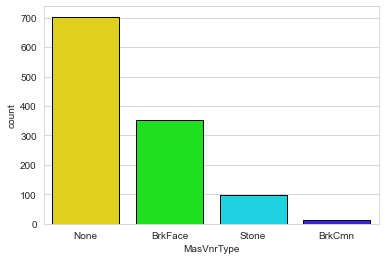

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


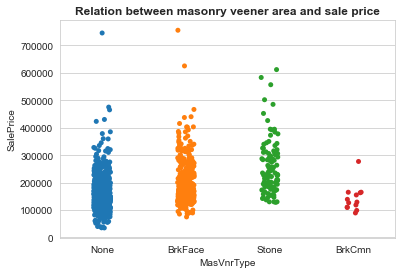

In [49]:
sns.countplot(df['MasVnrType'],palette='gist_rainbow',edgecolor='Black')
plt.show()
print(df.MasVnrType.value_counts())
#"Relation between masonry veener area and sale price"
sns.stripplot(x='MasVnrType', y="SalePrice",data=df)
plt.title("Relation between masonry veener area and sale price",fontweight='bold')
plt.show()

#### Observations:
* Most of the houses did not had masonry veneer area 
* 354 houses had BrkFace	Brick Face type of masonry veneer area 
* Masonry veneer area with BrkCmn	Brick Common was the least 
* There were no houses with CBlock	Cinder Block masonry veneer area
* houses with Stone	Stone masonry veneer area were moderate in number (98)
* prices for No masVnr area were dense in range 50000 to 350000 
* Houses with Brick common masonry veneer area had the lowest prices concentrated between 10000 to 150000

### Foundation: Type of foundation

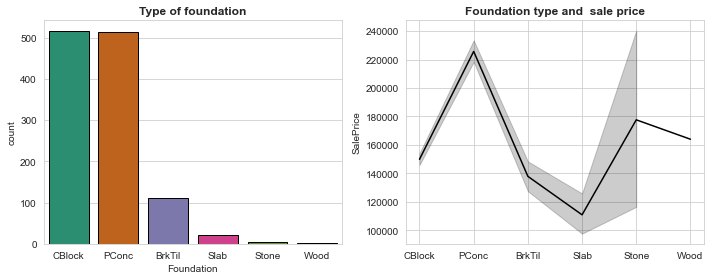

In [50]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df['Foundation'],palette='Dark2',edgecolor='black')
plt.title("Type of foundation",fontweight='bold')

plt.subplot(1,2,2)
sns.lineplot(x='Foundation',y="SalePrice",data=df,color='k')
plt.title("Foundation type and  sale price",fontweight='bold')

plt.xlabel(None)
plt.tight_layout()
plt.show()

#### Observations:
* maximum number of houses (516) had foundation of type CBlock	Cinder Block
* PConc	Poured Contrete	 type of foundation could be seen in 513 properties
* Stone and wood type of foundation was the least
* BrkTil Brick & Tile foundation was available for 112 properties 
* properties with poured concrete foundation recorded the highest price which was 230000
* Slab Foundations showed the least price that was 110000 
* properties with stone foundations had higher prices than properties with slab foundation and wood foundation

### BsmtQual: Evaluates the height of the basement and BsmtExposure: Refers to walkout or garden level walls

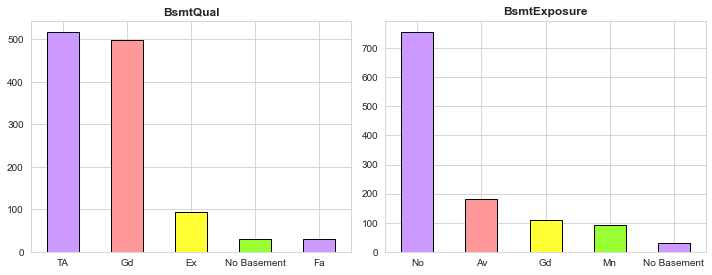

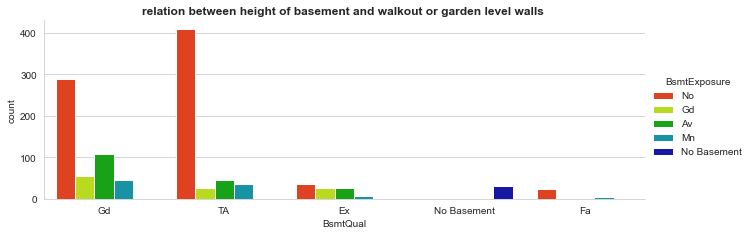

In [51]:
basement_list=['BsmtQual','BsmtExposure']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(10,8))
for i in basement_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#cc99ff','#ff9999','#ffff33','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
#relation between height of basement and walkout or garden level walls
sns.catplot(x='BsmtQual',kind="count",hue='BsmtExposure',palette='nipy_spectral_r', data=df,height=3,aspect=3)
plt.title("relation between height of basement and walkout or garden level walls ",fontweight='bold')
plt.show()
plt.show()

#### Observations:
    
* For Height of basement most of the houses had average height and Good heights
* very few properties had no basement at all
* There were many properties with No walkout or garden level walls
* when the basement height was good and typical average (TA) most of the properties had no brick and garden walls.
* No basement heights were rated as poor.

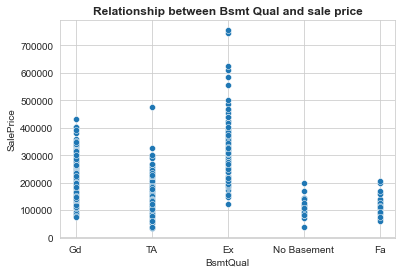

In [52]:
sns.scatterplot(x='BsmtQual',y='SalePrice',data=df)
plt.title("Relationship between Bsmt Qual and sale price",fontweight='bold')
plt.show()

#### Observations:
   * For excellent basement quality i.e area above 100 inches the sale prices ranged from 100000 to 500000 with some outlier sale price of 700000 and above.
   * The basements with 70-79 inches had least sale prices that ranged from 50000 to 100000.

### BsmtFinType1: Rating of basement finished area and BsmtFinType2: Rating of basement finished area (if multiple types)


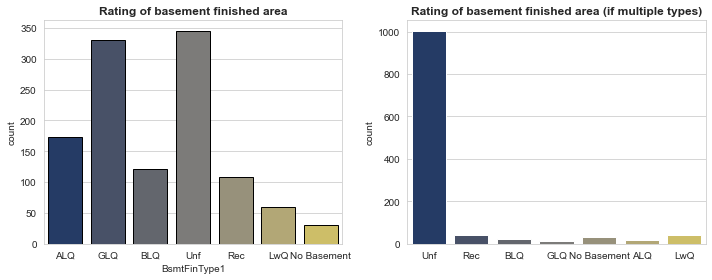

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df['BsmtFinType1'],palette='cividis',edgecolor='black')
plt.title("Rating of basement finished area",fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(df['BsmtFinType2'],palette='cividis')
plt.title("Rating of basement finished area (if multiple types)",fontweight='bold')

plt.xlabel(None)
plt.tight_layout()
plt.show()

#### observations:
* plently of the basements were  Unf	Unfinshed
* The second highest number of properties had GLQ	Good Living Quarters
* ALQ	Average Living Quarters and  BLQ	Below Average Living Quarters	 could also be seen
* For multiple types most of the properties had unfinished basement rest of the records were few.      


### Basement areas
* 'BsmtFinSF1':Type 1 finished square feet
* 'BsmtFinSF2':Type 2 finished square feet
* 'BsmtUnfSF':Unfinished square feet of basement area
* 'TotalBsmtSF': Total square feet of basement area

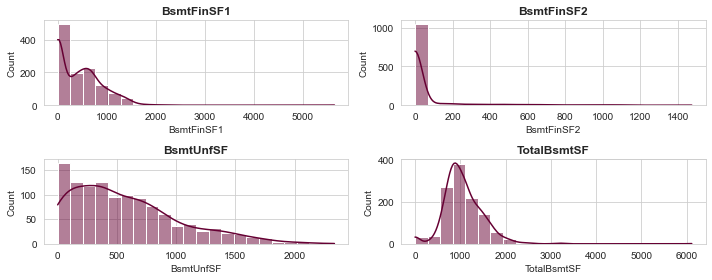

In [54]:
base_list=[ 'BsmtFinSF1',  'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(10,4))
for i in base_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.histplot(df[i],color='#660033',kde=True,bins=int(180/8))
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
plt.show()

#### Observations:
* For BsmtFin Type 1 and BsmtFinSf2 type 2 finished square feet most of the entries were 0
* for BsmtUnfSF: Unfinished square feet of basement area the area ranged from 270 to 2046
* For the total basement area we can see a normal distribution curve.
* The total area ranged from 799 to almost 6100.
* The peak basement area was 1004 square ft.

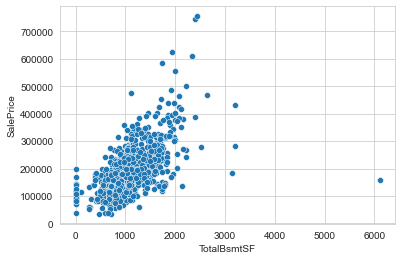

In [55]:
sns.scatterplot(data = df, x = "TotalBsmtSF", y = "SalePrice");

#### observations:
* the total basement area distribution was dense between 1000 to 2000 sq.ft and the sale prices there ranged from 100k to 450k

### basement condition

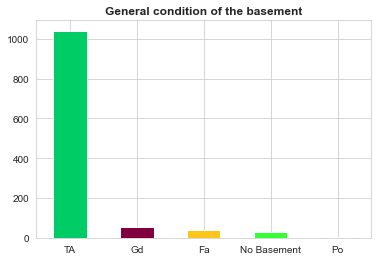

In [56]:
df['BsmtCond'].value_counts().plot(kind='bar',color=['#00cc66','#800040','#ffc61a','#33ff33'])
plt.title("General condition of the basement",fontweight='bold')
plt.xticks(rotation=360)
plt.show()


#### Observations:
* Maximum number of properties had typical average quality of basements
* Very few properties were rated as poor basement.
* some of the basements quality were good and fair.


### Heating: Type of heating ,HeatingQC: Heating quality and condition

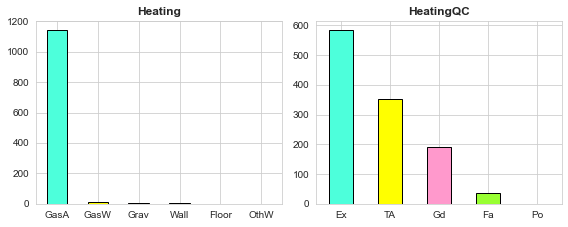

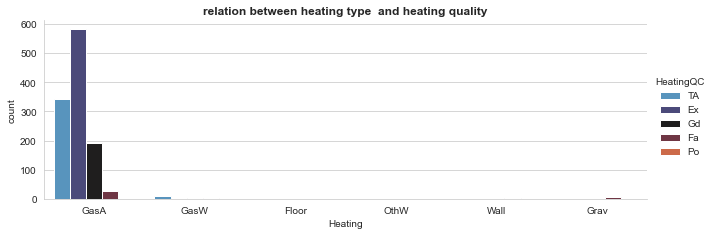

In [57]:
heat_list=['Heating','HeatingQC']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(8,6))
for i in heat_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#4dffdb','#ffff00','#ff99cc','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
#relation between heating type  and heating quality
sns.catplot(x='Heating',kind="count",hue='HeatingQC',palette='icefire', data=df,height=3,aspect=3)
plt.title("relation between heating type  and heating quality",fontweight='bold')
plt.show()
plt.show()

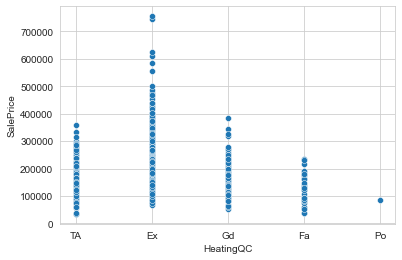

In [58]:
sns.scatterplot(data = df, x = "HeatingQC", y = "SalePrice");

#### Observations:
* Maximum number of properties had  GasA	Gas forced warm air furnace with excellent quality.
* GasW	Gas hot water or steam heat were less in number and were of typical average quality.
* GasA had no poor quality.
* Grav	Gravity furnace and wall furnace were minimum
* properties with excellent heating quality had higher prices
* poor quality heating had least sale price of 80000

### CentralAir: Central air conditioning

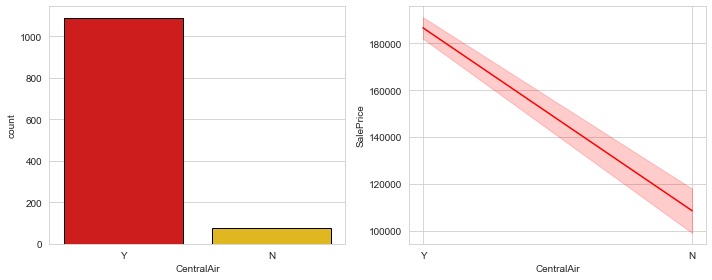

In [59]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df['CentralAir'],palette='hot',edgecolor='black')

plt.subplot(1,2,2)
sns.lineplot(x='CentralAir',y='SalePrice',data=df,color='red')
plt.tight_layout()
plt.show()

#### Observations:
* Almost 90% of the propeties(1090) had Central air conditioner.
* The sale prices were highest for properties with Air condtioner,the price was above 180000.
* About 80 homes did not had central air conditioner and their prices were around 110000.


### Electrical: Electrical system

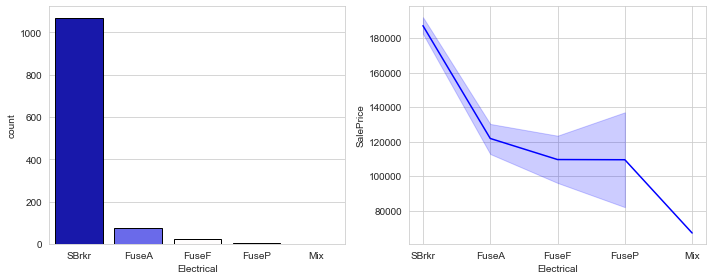

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df['Electrical'],palette='seismic',edgecolor='black')

plt.subplot(1,2,2)
sns.lineplot(x='Electrical',y='SalePrice',data=df,color='blue')
plt.tight_layout()
plt.show()

#### Observations:
* SBrkr	Standard Circuit Breakers & Romex were the maximum 
* The sale price for standard CB were the maximum it was above 180000
* FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	was second highest
* For mix type of electrical systems the sale prices were below 50000 which was the least among all.
* properties with FuseF and FuseP type of electrical system had same prices (~110000)

### 1stFlrSF: First Floor square feet and 2ndFlrSF: Second floor square feet

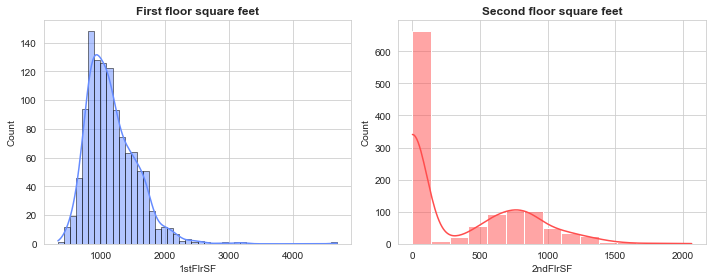

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['1stFlrSF'],edgecolor='black',kde=True,color='#668cff')
plt.title("First floor square feet",fontweight='bold')

plt.subplot(1,2,2)
sns.histplot(df['2ndFlrSF'],kde=True,color='#ff4d4d')
plt.title("Second floor square feet",fontweight='bold')

plt.tight_layout()
plt.show()

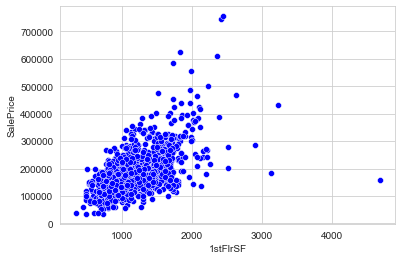

In [62]:
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df,color='blue')
plt.show()

###  LowQualFinSF: Low quality finished square feet (all floors)

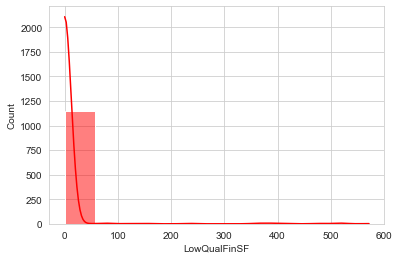

In [63]:
sns.histplot(df['LowQualFinSF'],bins=10,color='red',kde=True)
plt.show()
#print(df['LowQualFinSF'].value_counts())


#### Observations:
* Most of the entries (above 80%) were 0 so this feature does not provide any relevant information.


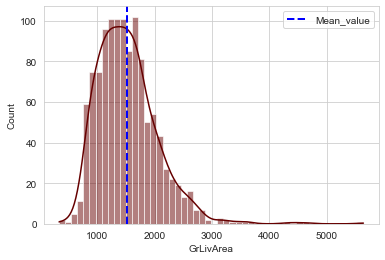

In [64]:
### GrLivArea: Above grade (ground) living area square feet

sns.histplot(df['GrLivArea'],bins=50,kde=True,color='#660000')
mean_val=np.mean(df['GrLivArea'])
plt.axvline(mean_val,linewidth=2,color='blue',label='Mean_value',linestyle='--')
plt.legend()
plt.show()

#### Observations:
* The above grade living area ranged from 334 square feet to maximum 5642 sq.ft.
* Most of the properties had areas as 864 sq.ft ,1040 sq.ft and 890 sq.ft
* The mean value of living area above grade is 1525 


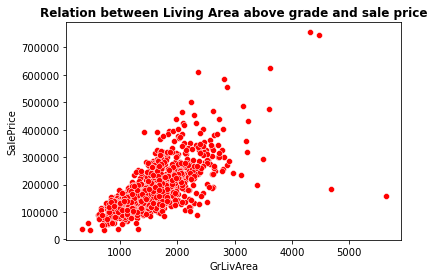

In [5]:
#relation between GRLiv Area and sale price
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df,color='red')
plt.title("Relation between Living Area above grade and sale price",fontweight='bold')
plt.show()


#### Observations:
* The area is dense between 800 to 2000 square feet.
* Mostly the prices lies from 80000 to 300000.
* Few outliers are seen where the area was 4000 square feet and above.
* For 4500 sq.ft the price was as high as 750000

### BsmtFullBath: Basement full bathrooms and BsmtHalfBath: Basement half bathrooms

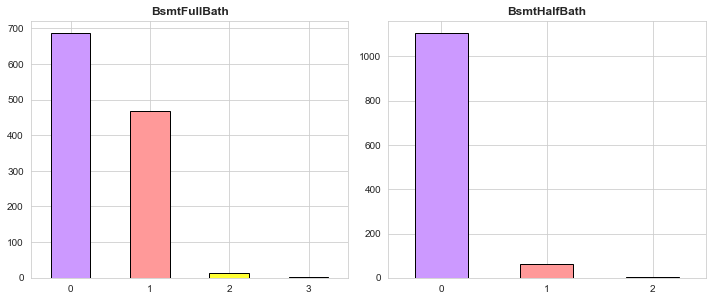

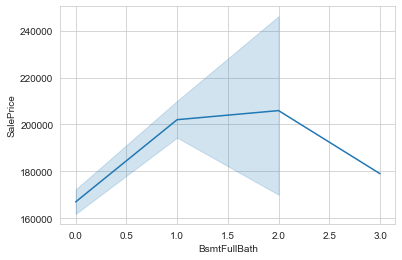

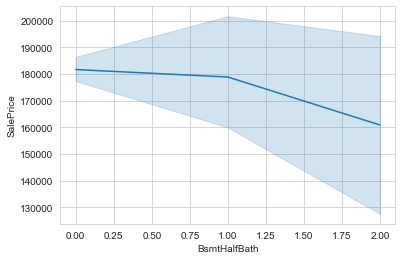

In [66]:

basement_bath_list=['BsmtFullBath','BsmtHalfBath']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(10,8))
for i in basement_bath_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#cc99ff','#ff9999','#ffff33','#99ff33'], edgecolor='black')
    
    c = c + 1
    plt.xticks(rotation=360)
    plt.tight_layout()
plt.show()
for i in basement_bath_list:
    sns.lineplot(x=i,y='SalePrice',data=df)  
    c=c+1
    plt.show()

#### observations:
    
* Most of the properties lacked full and half bathrooms in the basement.
* if bathrooms were present in the basement there were only 1 most of the time.
* Properties with more number of bathrooms had high sale pirces.
* Also for single Half bath the prices were as high as 215000
* For 2 half bathrooms at the basement the sale price was  as low as 162500
* For zero half bathrooms the sale price was least.

### FullBath: Full bathrooms above grade and HalfBath: Half baths above grade


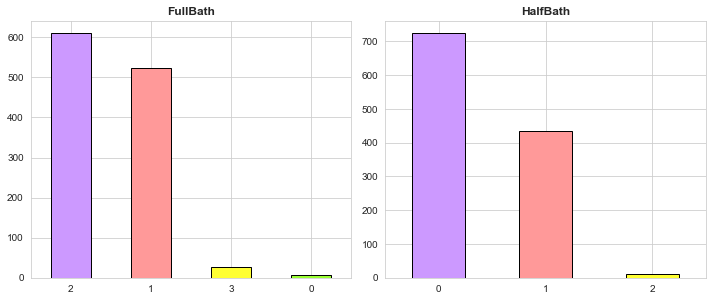

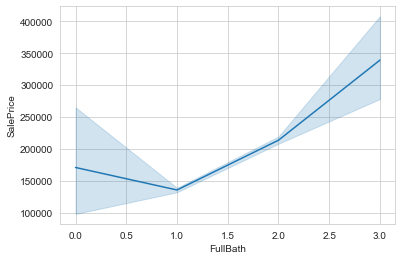

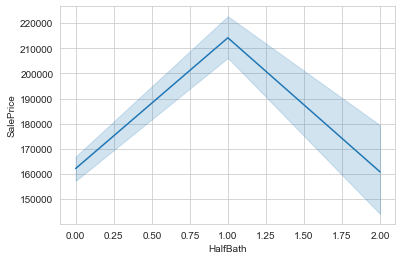

In [67]:
bath_above_list=['FullBath','HalfBath']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(10,8))
for i in bath_above_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#cc99ff','#ff9999','#ffff33','#99ff33'], edgecolor='black')
    
    c = c + 1
    plt.xticks(rotation=360)
    plt.tight_layout()
plt.show()
for i in bath_above_list:
    sns.lineplot(x=i,y='SalePrice',data=df)  
    c=c+1
    plt.show()

#### Observations:
    
* Most of the properties had 2 full bathrooms above grade and there sale price was around 225000
* around 525 properties had 1 full bathroom above grade and there price was least = 125000
* Maximum number of properties did not had half bathrooms above.
* If there was a single half bathroom above grade the property sale price was highest at 215000

### Bedroom: Bedrooms above grade (does NOT include basement bedrooms) ,Kitchen: Kitchens above grade and KitchenQual: Kitchen quality

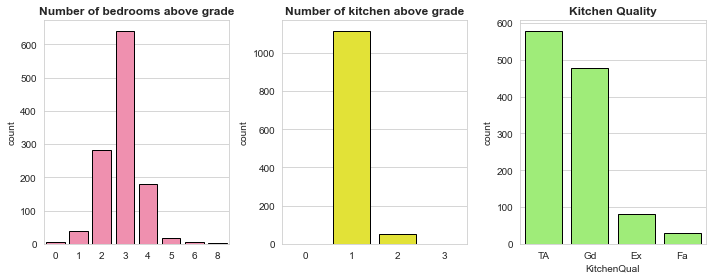

In [68]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.countplot(df['BedroomAbvGr'],color='#ff80aa',edgecolor='black')
plt.xlabel(None)
plt.title("Number of bedrooms above grade",fontweight='bold')


plt.subplot(1,3,2)
sns.countplot(df['KitchenAbvGr'],color='#ffff1a',edgecolor='black')
plt.xlabel(None)
plt.title("Number of kitchen above grade",fontweight='bold')

plt.subplot(1,3,3)
sns.countplot(df['KitchenQual'],color='#99ff66',edgecolor='black')
plt.title("Kitchen Quality",fontweight='bold')


plt.tight_layout()
plt.show()

#### Observations:

* Maximum  properties had 3 bedrooms above grade,followed by 2 bedrooms.
* Very few properties had 0,6 and 8 bedrooms above grade.
* Most of the properties had 1 kitchen and the kitchen quality was typically average.
* Very few kitchens were rated fair in terms of quality.
* Many of the kitchen were also rated as good
* There were moderate number of excellent quality kitchens

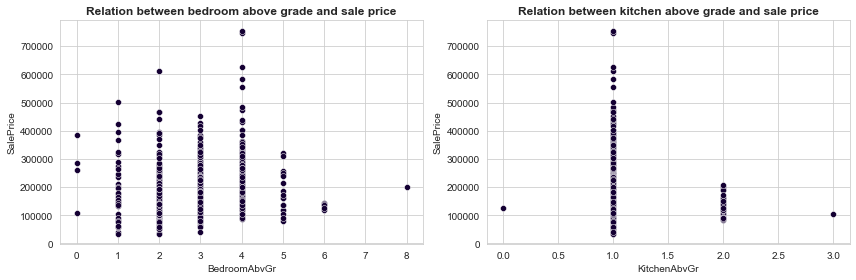

In [69]:
#relation between bedroom above grade and sale price
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x='BedroomAbvGr',y='SalePrice',data=df,color='#140033')
plt.title("Relation between bedroom above grade and sale price",fontweight='bold')

plt.subplot(1,2,2)
sns.scatterplot(x='KitchenAbvGr',y='SalePrice',data=df,color='#140033')
plt.title("Relation between kitchen above grade and sale price",fontweight='bold')

plt.tight_layout()
plt.show()

#### Observation:
* for 0 and 3 kithchens above grade the sale price was around 11k .
* Maximum sale price was for 1 kitchen above grade.
* For 8 bedrooms above grade the price was 200K
* Max prices were for 4 bedrooms above grade.

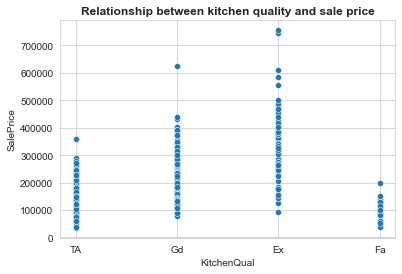

In [70]:
sns.scatterplot(x='KitchenQual',y='SalePrice',data=df)
plt.title("Relationship between kitchen quality and sale price",fontweight='bold')
plt.show()

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

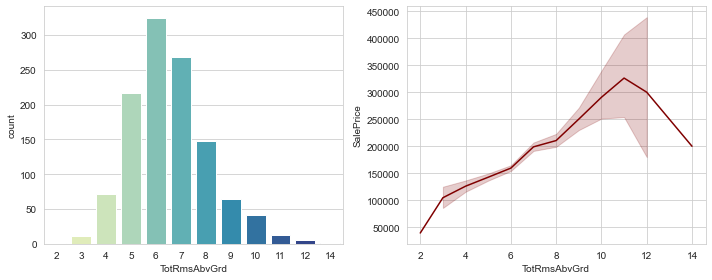

In [71]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df['TotRmsAbvGrd'],palette="YlGnBu")

plt.subplot(1,2,2)
sns.lineplot(x='TotRmsAbvGrd',y='SalePrice',data=df,color='maroon')
plt.tight_layout()
plt.show()

#### Observations:
* Most of the properties had 6 rooms followed by 7 rooms and then 5 rooms    
* Around 325 properties had 6 rooms above grade.
* Only 11 houses had 3 rooms above.
* Number of houses with 2 and 14 rooms above grade were the least (1 house each)
* When the properties had only 2 rooms above grade the sale price was minimum
* An increasing trend in the saleprice could be seen as the number of rooms above grade increases until 10.
* Above 10 rooms the sale price could be seen dropping


### Functional: Home functionality (Assume typical unless deductions are warranted)

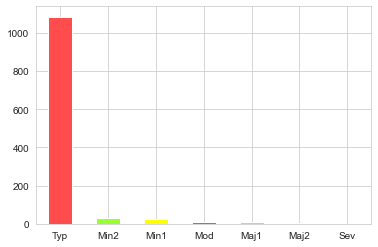

In [72]:
df.Functional.value_counts().plot(kind='bar',color=['#ff4d4d','#99ff33','#ffff00'])
plt.xticks(rotation=360)
plt.show()

#### Observations:
* maximum number of properties had Typ	Typical Functionality
* Min1	Minor Deductions and  Min2	Minor Deductions 2 were same in number and were very low as compared to typical functionality
* Mod	Moderate Deductions and Maj1	Major Deductions were the least
* Severly damaged could not be seen much 

### Fireplaces: Number of fireplaces and FireplaceQu: Fireplace quality

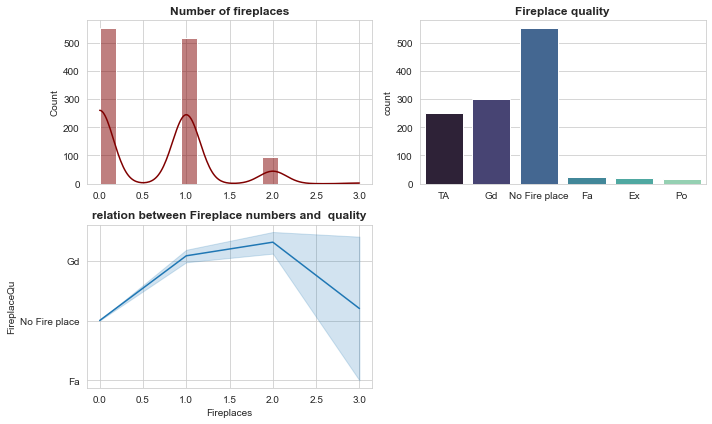

In [73]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(df['Fireplaces'],color='#800000',kde=True)
plt.xlabel(None)
plt.title("Number of fireplaces",fontweight='bold')

plt.subplot(2,2,2)
sns.countplot(df.FireplaceQu,palette='mako')
plt.title("Fireplace quality",fontweight='bold')
plt.xlabel(None)


plt.subplot(2,2,3)
plt.title("relation between Fireplace numbers and  quality",fontweight='bold')
sns.lineplot(x='Fireplaces',y='FireplaceQu',data=df)
plt.tight_layout()
plt.show()


#### Observations:
* When the fireplaces were 1 or 2 in number the quality of fireplace was good.
* Many properties did not had fireplace at all.
* 518 properties had 1 fireplace
* only 5 houses had 3 fireplaces
* In terms of quality most of the fireplaces were rated good and a very few were bad in quality.
* For 1 and 2 fireplaces good quality was maintained

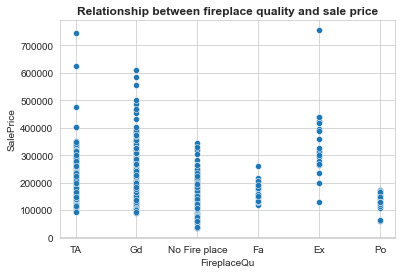

In [74]:
sns.scatterplot(x='FireplaceQu',y='SalePrice',data=df)
plt.title("Relationship between fireplace quality and sale price",fontweight='bold')
plt.show()

### GarageType: Garage location ,GarageFinish: Interior finish of the garage


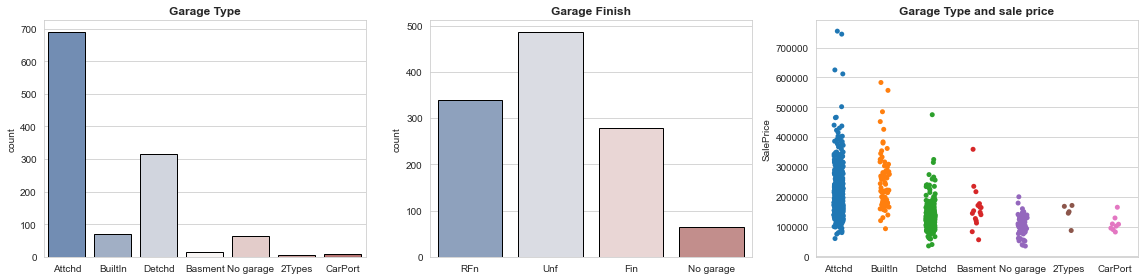

In [75]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.countplot(df.GarageType,edgecolor='black',palette='vlag')
plt.title("Garage Type",fontweight='bold')
plt.xlabel(None)
plt.subplot(1,3,2)
sns.countplot(df.GarageFinish,edgecolor='black',palette='vlag')
plt.title("Garage Finish",fontweight='bold')
plt.xlabel(None)

plt.subplot(1,3,3)
sns.stripplot(x='GarageType',y='SalePrice',data=df)
plt.title("Garage Type and sale price",fontweight='bold')
plt.xlabel(None)
plt.tight_layout()
plt.show()

#### Observations:
* Most of the properties had attached to home garage and the sale prices ranged from 75000 to 450000 densely.
* detached kind of garages had the second highest count.
* Popeties with Carport kind of garage had the least sale prices.
* Most of the garages were in unfinished condition followed by roughly finished.


### GarageYrBlt: Year garage was built


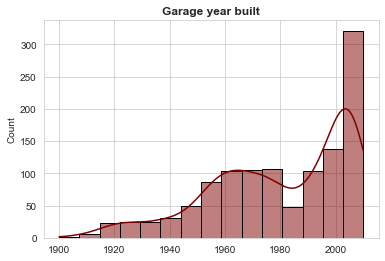

In [76]:
sns.histplot(df.GarageYrBlt,edgecolor='black',kde=True,color='#800000')
plt.title("Garage year built",fontweight='bold')
plt.xlabel(None)
plt.show()

#### Observations:
* Most of the garages were built in from 2003 to 2006,with maximum record in 2006.
* the very first garage was built in 1900
* From 1960 to 1980 almost similar number of garages were built.

### GarageCars: Size of garage in car capacity and GarageArea: Size of garage in square feet


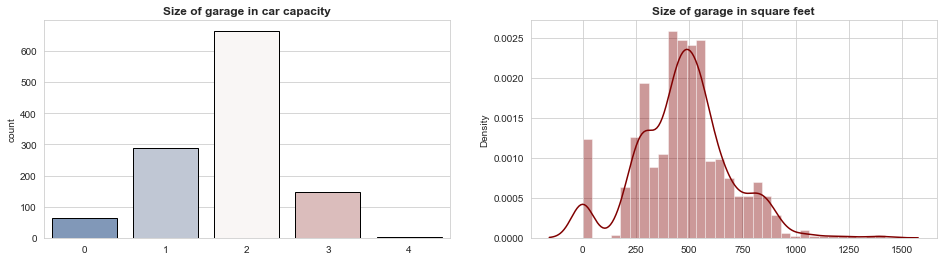

In [77]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.countplot(df.GarageCars,edgecolor='black',palette='vlag')
plt.title("Size of garage in car capacity",fontweight='bold')
plt.xlabel(None)
plt.subplot(1,2,2)
sns.distplot(df.GarageArea,color='Maroon')
plt.title("Size of garage in square feet",fontweight='bold')
plt.xlabel(None)
plt.show()

#### Observations:
* The number of garages with capacity of 2 cars was the maximum , followed by 1 car capacity.
* garages with capacity of 4 cars were very less in number.
* In terms of area most of the garages had an area of about 400 to 600 square feet.
* very few garages had an area more than 750 square feet

### GarageQual: Garage quality and GarageCond: Garage condition


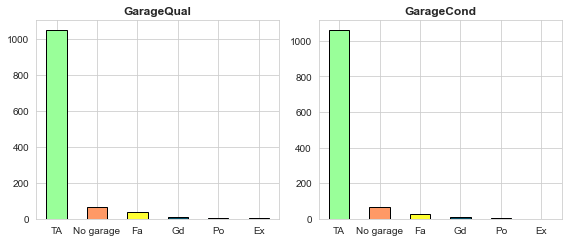

In [78]:
my_list=['GarageQual', 'GarageCond']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
fig = plt.figure(figsize=(8,4))

for i in my_list: 
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    df[i].value_counts().plot(kind='bar',color= ['#99ff99','#ff9966','#ffff33','#004d66','#80ffdf'],
                                       edgecolor='black')
    plt.title(i,fontweight='bold')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
plt.show()

#### Observations:
* For both the quality and condition of garage most of the houses were rated as typical average.
* The number of ratings for both were same,hence we can only consider either of them while model building.


### PavedDrive: Paved driveway

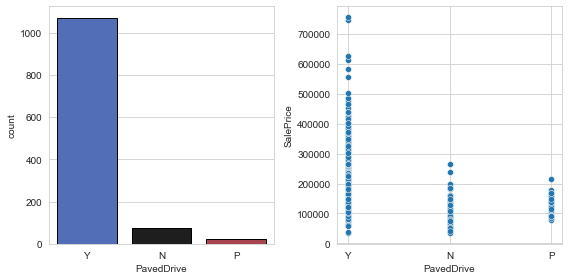

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


In [79]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.countplot(df['PavedDrive'],palette='icefire',edgecolor='Black')

plt.subplot(1,2,2)
sns.scatterplot(x='PavedDrive',y='SalePrice',data=df)
plt.tight_layout()
plt.show()
print(df.PavedDrive.value_counts())


#### Obseravtions:

* Most of the properties had Y	Paved driveway
* P	Partial Pavement was least
* Moderate number of houses had N	Dirt/Gravel driveway
* properties with paved drives had higher prices.
* the price margin for partial pavement were the least


### Porch areas

* WoodDeckSF: Wood deck area in square feet

* OpenPorchSF: Open porch area in square feet

* EnclosedPorch: Enclosed porch area in square feet

* 3SsnPorch: Three season porch area in square feet

* ScreenPorch: Screen porch area in square feet

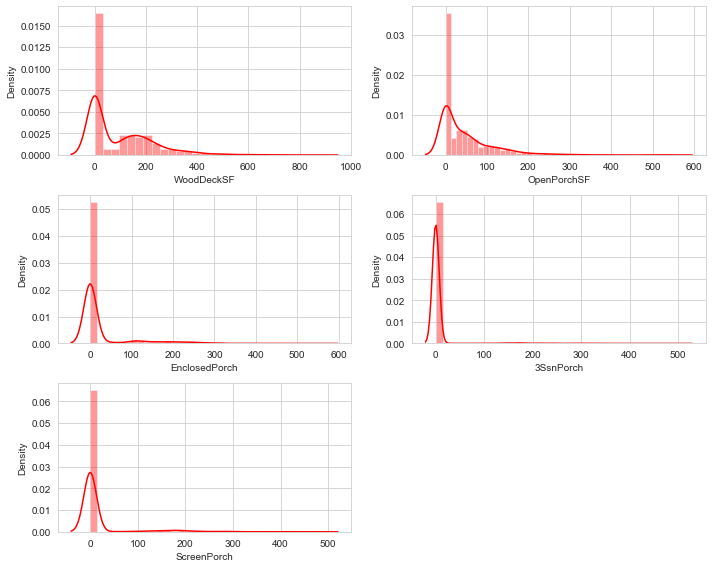

In [80]:
ncol=2
nrow=3
collist=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch']
plt.figure(figsize=(10,8))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]],color='r')
    plt.tight_layout()
plt.show()

#### Observations:
    
* For EnclosedPorch, 3SsnPorch and ScreenPorch most of the entries were 0
* WoodDeck area ranges from 0 to 850 with maximum entries as 0
* Open porch area in square feet ranged from 0 to 550 with maximum records as 0
* Hence we can say the porch areas does not provide any signficant information.


### Fence

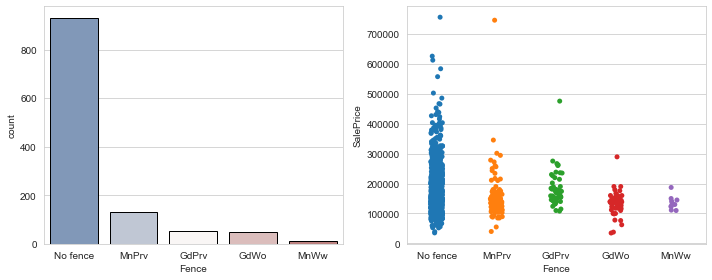

In [81]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(df.Fence,edgecolor='black',palette='vlag')

plt.subplot(1,2,2)
sns.stripplot(x='Fence',y='SalePrice',data=df)

plt.tight_layout()
plt.show()

#### Observations:
    
* maximum number of properties did not had any fence.
* The sale price for properties with No fence were dense between 100000 to 350000.
* Houses with MnWw (Minimum Wood/Wire) fence had sale price between 10000 to 20000 and were very low in number.
* Most of the houses could be seen with Minimum privacy fence 
* Properties with GDprv i.r good privacy and GdWo i.e. good wood fence were same in number

### MiscFeature: Miscellaneous feature not covered in other categories and MiscVal: Value of miscellaneous feature

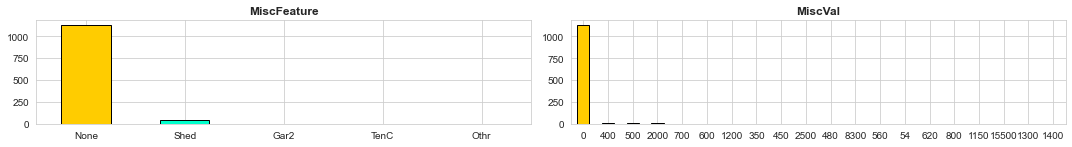

In [82]:
misc_list=['MiscFeature','MiscVal']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,4))
for i in misc_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#ffcc00','#00ffcc','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
plt.show()

#### Observations:
* Most of the had no Miscellaneous feature covered in other categories
* Around 40 properties had shed 
* The value of miscellaneous feature were around 400 /500 /2000
* As many properties did not had miscellaneous feature the miscellaneous value was zero was maximum of them.

### MoSol:Month sold and YrSold: Year sold

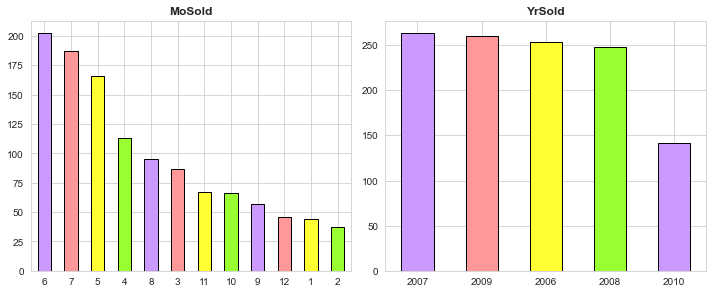

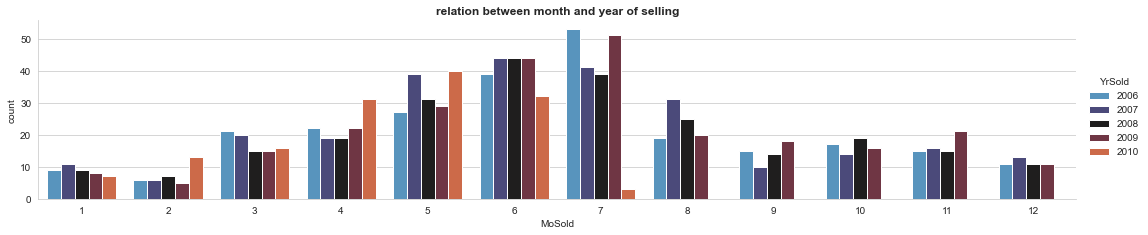

In [83]:
yr_month_list=['MoSold','YrSold']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(10,8))
for i in yr_month_list: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#cc99ff','#ff9999','#ffff33','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
#relation between month and year
sns.catplot(x='MoSold',kind="count",hue='YrSold',palette='icefire', data=df,height=3,aspect=5)
plt.title("relation between month and year of selling",fontweight='bold')
plt.show()


#### Observations for year sold:
* Most of the properties were sold in 2007 and 2009
* Least number of properties were sold in 2010
* Almost same number of properties were sold in year 2006 and 2008

#### Observations for Month Sold:
* From the plot we can infer that most of the sales took place in the 6th month i.e 'June' followed by 7th(July) and the 5th month i.e May.
* Least number of properties were sold in the month of february(2)
* Almost same number of properties were sold in the month of jan and december
* 11th and 10th month that is october and november witnessed same number of sales

#### Observations for the bivariate analysis(month v/s year)
* For the year 2006 most of the sales took place in the month of july(7) and then in June(6)
* for year 2007 highest sales were during june and the least were in february
* For year 2010 no sales took place after July
* The highest sales for year 2010 happened in the month of 'May'
* For 2007,2008 and 2009 similar number of houses were sold in june.
* very few sales took place in February

### Bivariate analysis of year v/s sale price and month v/s sale price


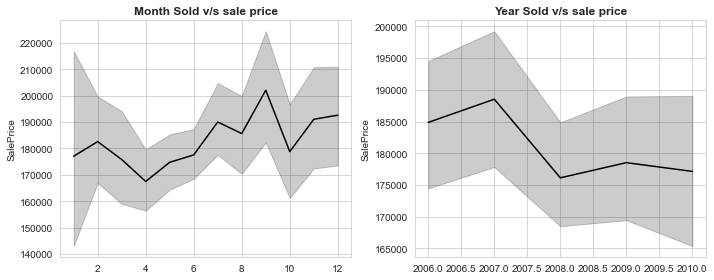

In [84]:
#relation between year sold and the sale price
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.lineplot(x='MoSold',y="SalePrice",data=df,color='k')
plt.title("Month Sold v/s sale price",fontweight='bold')
plt.xlabel(None)
plt.subplot(1,2,2)
sns.lineplot(x='YrSold',y="SalePrice",data=df,color='k')
plt.title("Year Sold v/s sale price",fontweight='bold')
plt.xlabel(None)
plt.tight_layout()
plt.show()

#### Observations for month sold v/s sale price:
* The highest sale prices were observed in the month of september(9).
* From august to september there was rise in the sale prices but after september the prices dropped down to 180000
* The sale prices were never stable 
* The second highest sale price were recorded in July followed by november 
* The sale price was minimum during April

#### Observations for year sold v/s sale price:
* for the time period between 2006 to 2007 we can an increase in the sale price.
* After the year 2007 untill 2008 the sale price dropped drastically from 187500 to 177500
* In 2008 the sale prices increased slightly upto the year 2009
* From year 2009 to 2010 a small declination could be seen
* 2008 witnessed the minimum sale prices

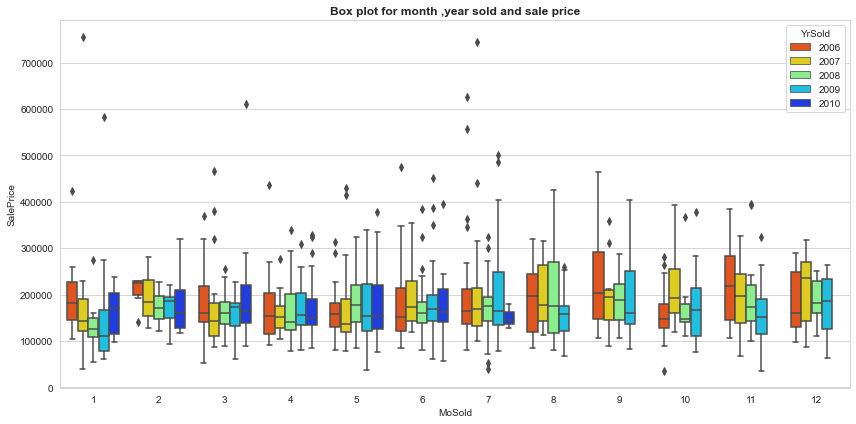

In [85]:
plt.figure(figsize=(12,6))
#plt.subplot(1,2,1)
ax = sns.boxplot(x="MoSold", y="SalePrice",data=df, palette='jet_r',hue='YrSold')
plt.title("Box plot for month ,year sold and sale price",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* No outliers were seen in the sale price for all the years in the month of december
* There were too many outliers in the month of June 
* The highest prices for 2006 were in the month of september
* In the month of feb only outliers were for the year 2006
* In september-2007 there were few outliers
* The highest number of outliers in July-2006



### SaleType: Type of sale and SaleCondition: Condition of sale



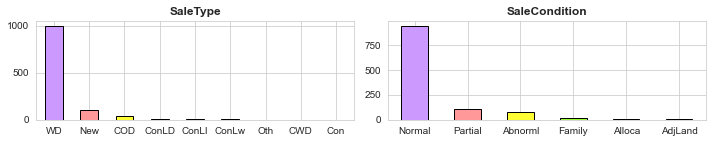

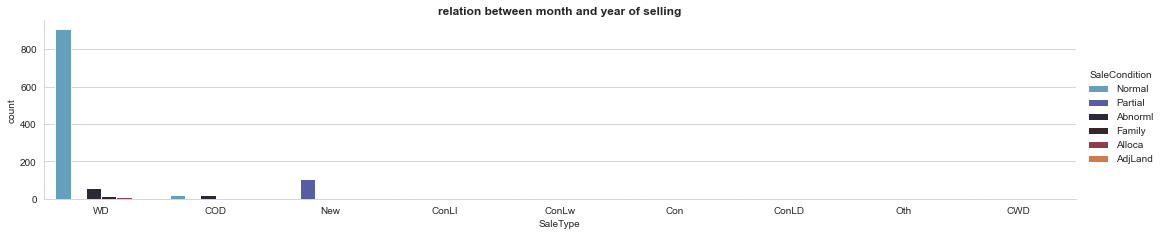

In [86]:
sale_list2=['SaleType','SaleCondition']
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(10,4))
for i in sale_list2: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    df[i].value_counts().plot(kind='bar',color= ['#cc99ff','#ff9999','#ffff33','#99ff33'],
                                       edgecolor='black')
    c = c + 1
    plt.tight_layout()
    plt.xticks(rotation=360)
#relation between sale type and sale condition
sns.catplot(x='SaleType',kind="count",hue='SaleCondition',palette='icefire', data=df,height=3,aspect=5)
plt.title("relation between month and year of selling",fontweight='bold')
plt.show()


#### Observations:
    
* Maximum number of the sales were  WD 	Warranty Deed - Conventional followed by New homes just constructed and sold.
* The warranty deed sales were done mostly under normal conditions.
* The newly constructed properties were sold in Partial condition were	Home was not completed when last assessed)
* No sales could be seen under CWD,oth and Con (Contract 15% Down payment regular terms)
* Alloca and AdjLand sale condition was recorded for very few properties



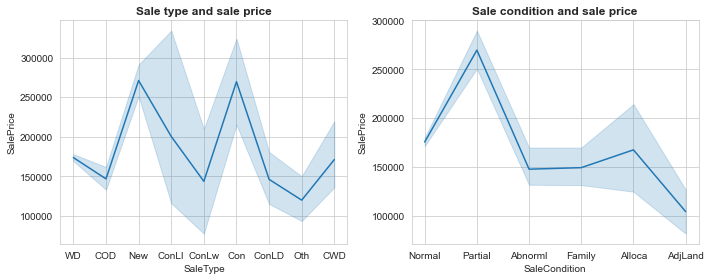

In [87]:
#plotting the trend of sale prices according to sale condition and  sale type
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.lineplot(y='SalePrice',x='SaleType',data=df)
plt.title("Sale type and sale price",fontweight='bold')
plt.subplot(1,2,2)
sns.lineplot(y='SalePrice',x='SaleCondition',data=df)
plt.title("Sale condition and sale price",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* The highest sale price were recorded for sale type New built house and Con	Contract 15% Down payment regular terms.
* The lowest price was seen as 125000 for other kinds of sales type.
* An increasing trend in sale price is seen from normal condition sales to partial where the home was not completed since last access.
* Abnormal and family condition of sales had stable prices = 150000.
* There was a steep decrease in sale price for Alloca and AdjLand


### Sale price


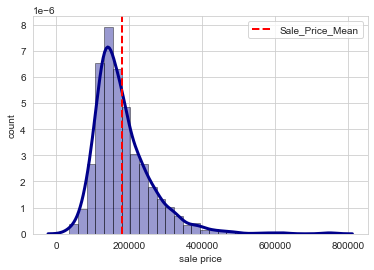

The mean value of sale price is 181477.0059931507
Highest price= 755000
minimum sale price= 34900


In [88]:
#studying the output/label
sns.distplot(df['SalePrice'], hist=True, kde=True, 
             bins=int(180/6), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
mean_val=np.mean(df['SalePrice'])
plt.axvline(mean_val,linewidth=2,color='red',label='Sale_Price_Mean',linestyle='--')
plt.xlabel('sale price')
plt.ylabel('count')
plt.legend()
plt.show()
print("The mean value of sale price is",df['SalePrice'].mean())
print("Highest price=",df['SalePrice'].max())
print("minimum sale price=",df['SalePrice'].min())


#### Observations:
* We can see a curve equivalent to normal distribution or gausian curve.
* Most number of houses were priced in the range between 139000 to 140000


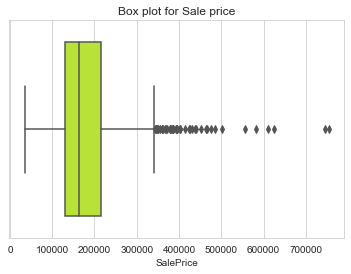

25th percentile or Q1= 130375.0
median= 163995.0
75th percentile or Q3= 215000.0


In [89]:
sns.boxplot(df['SalePrice'],orient='V',color='#c6ff1a')
plt.title("Box plot for Sale price")
plt.show()
print("25th percentile or Q1=",df['SalePrice'].quantile(0.25))
print("median=",df['SalePrice'].quantile(0.5))
print("75th percentile or Q3=",df['SalePrice'].quantile(0.75))


#### Observations:
    
* Thus we can observe certain outliers after 300000
* Different quantile values are shown above

### Plotting the outliers in numeric columns


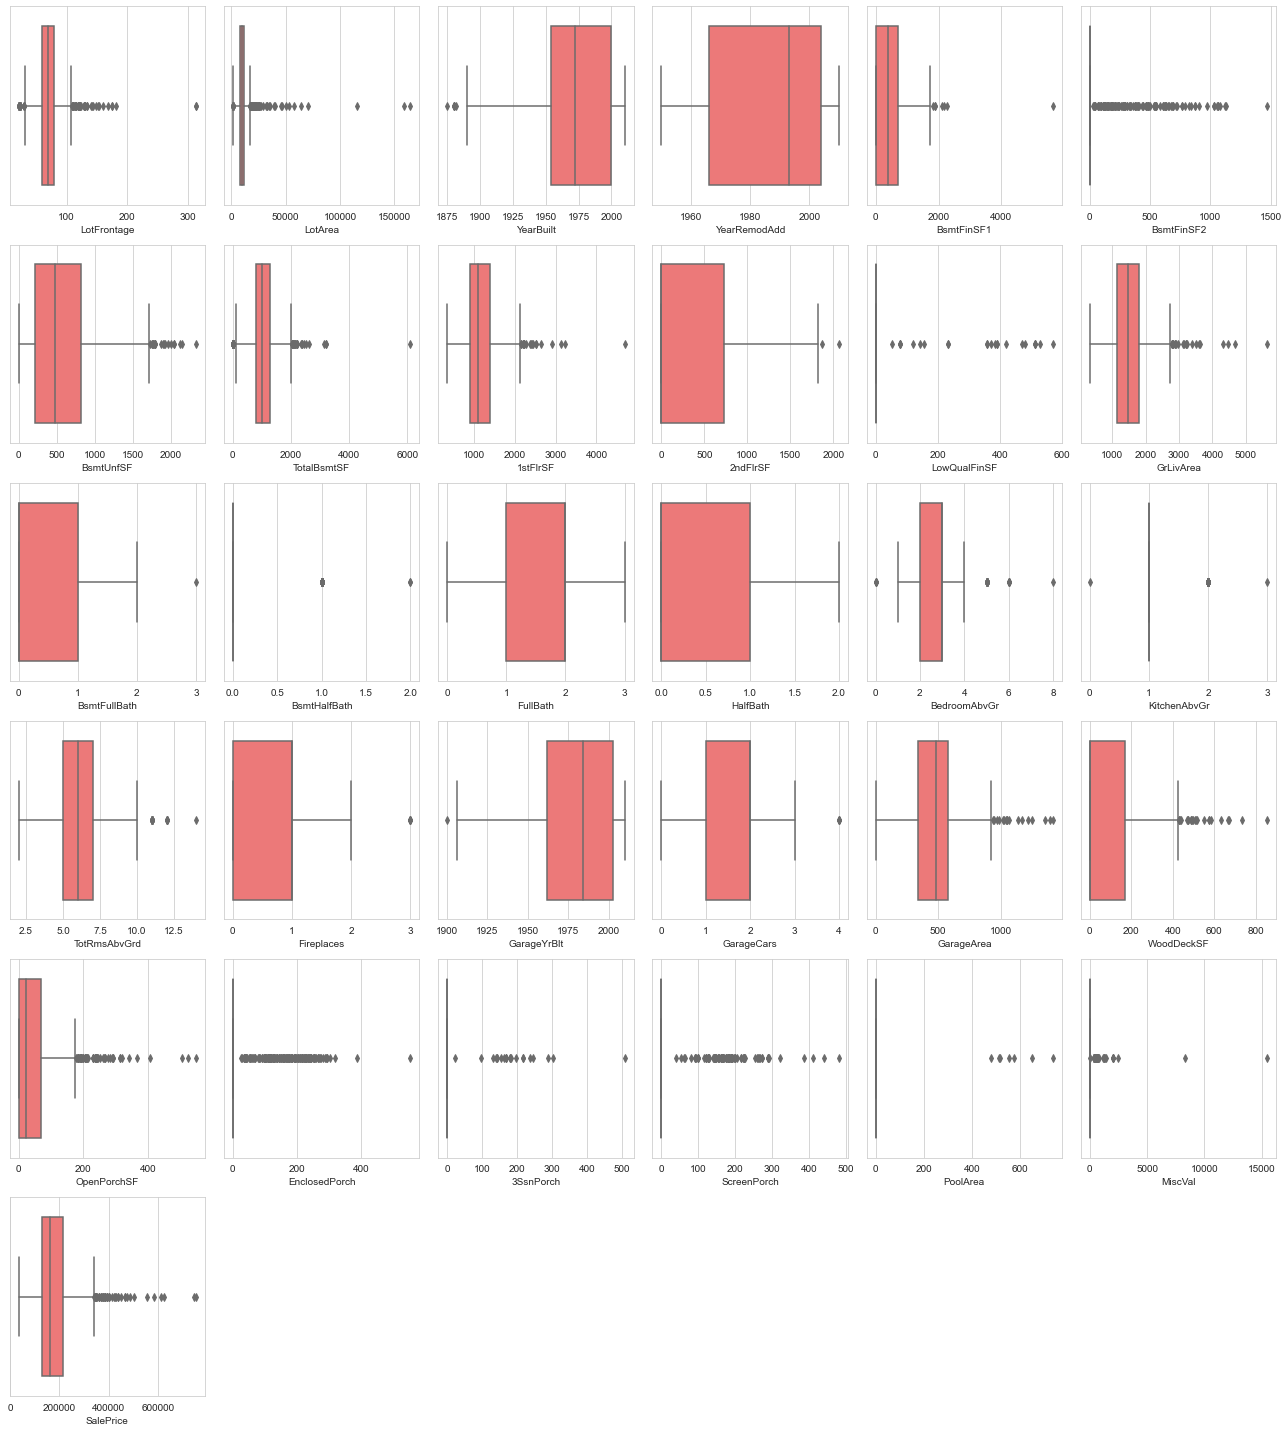

In [90]:
collist=df.describe().columns# select all the numeric columns
#  specify number of rows and columns for subplot
nrow=6
ncol=6
plt.figure(figsize=(18,20))
for i in range(0,len(collist)):
     plt.subplot(nrow,ncol,i+1)
     sns.boxplot(df[collist[i]],color='#ff6666',orient='v')
     plt.tight_layout()
plt.show()


#### Observations:
* Columns with no oultiers are: YrRemodAdd,Full bath,HalfBath ,GarageCars,Mosold and Yrsold,

### Statistical Analysis


In [91]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,70.807363,10484.749144,1970.930651,1984.758562,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,...,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,181477.005993
std,22.440317,8957.442311,30.145255,20.785185,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,...,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,79105.586863
min,21.000000,1300.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7621.500000,1954.000000,1966.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,...,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130375.000000
50%,70.000000,9522.500000,1972.000000,1993.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,...,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163995.000000
75%,79.250000,11515.500000,2000.000000,2004.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,...,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,215000.000000
max,313.000000,164660.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


#### Observations:
* High Standard deviations could be seen in 
    * LotArea
    * BsmtFinSf1
    * BsmtFinSF2
    * BsmtunfSF
    * WoodDeckSF
    * Miscall Val
    * Sale Price


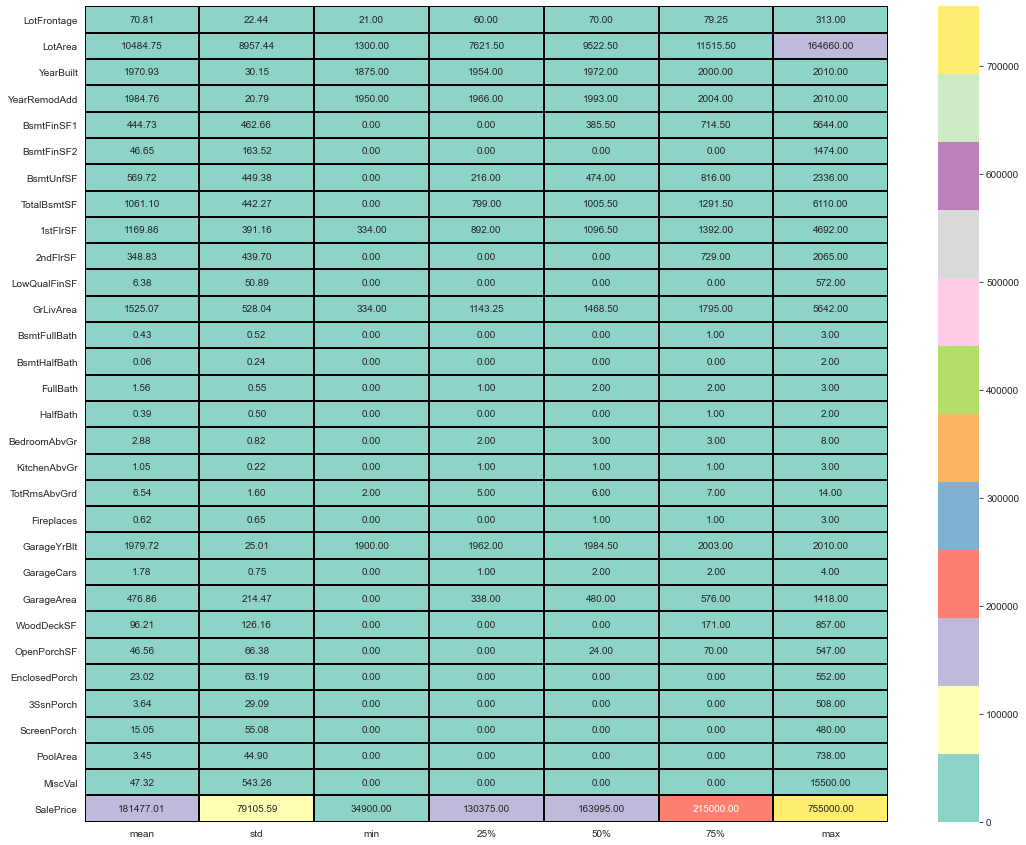

In [92]:
#plotting the df.describe
plt.figure(figsize=(18,15))
sns.heatmap(df.describe()[1:].transpose(),cmap='Set3',linewidth=2,linecolor='black',annot=True,fmt='.2f')
plt.show()


In [93]:
# checking correlation between all variables
df.corr()["SalePrice"].sort_values(ascending = False)


SalePrice        1.000000
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
Fireplaces       0.459611
GarageYrBlt      0.381997
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323851
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

### To make the correlation matrix more readable let us plot a heatmap for the same


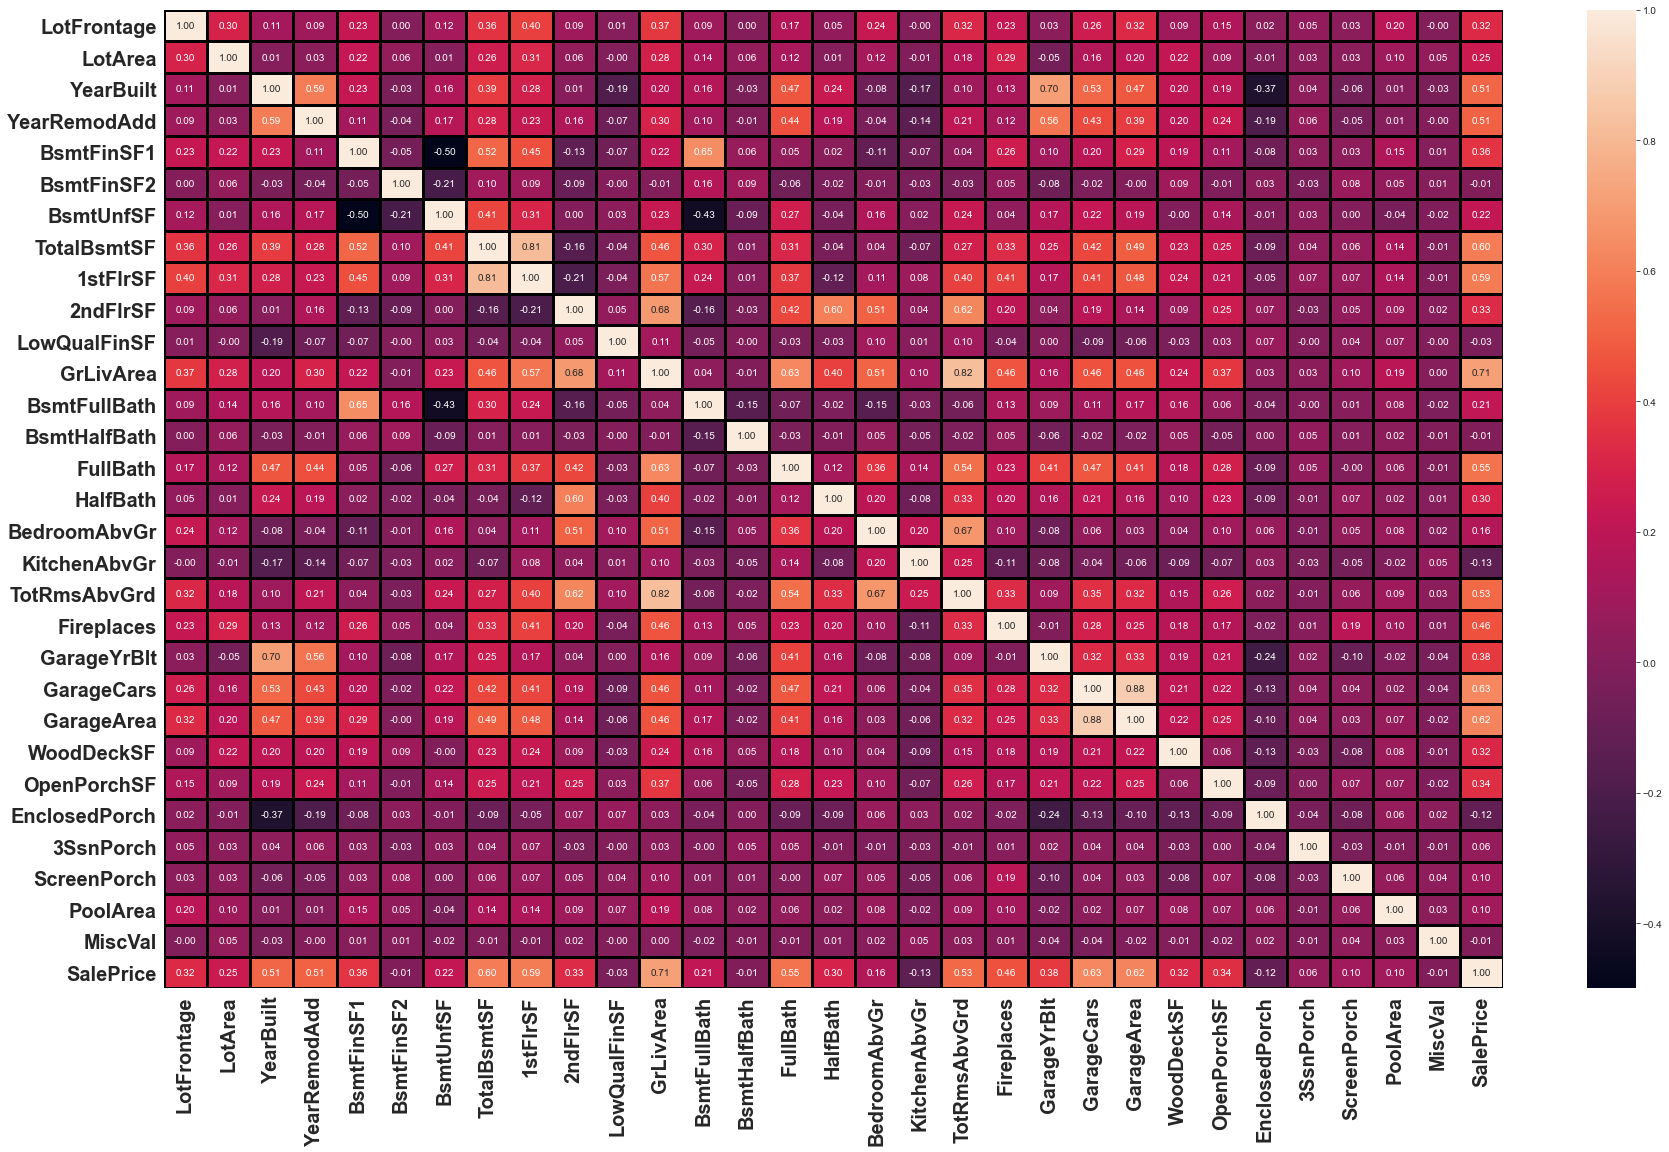

In [94]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=3,linecolor="black")
plt.xticks(fontweight='bold',fontsize=20)
plt.yticks(fontweight='bold',fontsize=20)
plt.show()


#### Observations:
    
* Columns with highest positive correlation with the target are:

    * GrLivArea(0.71)
    * GarageCars (0.63)
    * GarageArea (0.62)
    * TotalBsmtSF(0.60)
    * 1stFlrSF (0.59)
    * FullBath(0.55)
    * TotRmsAbvGrd(0.53)
    * YrBuilt(0.51)
    * YrRemodAdd(0.51)
* Columns with neagtive and least correlation with target:
    * BsmtFinSF2(-0.01)
    * lowQualFinSf(-0.03)
    * BsmtHalfBath(-0.01)
    * KitchenAbvGr(-0.13)
    * Enclosed Porch (-0.12)
    * MiscalVal(-0.01)
* Columns that are positively correlated with the target but with very less correlation:
    * 3SsnPorch(0.06)
    * BedroomAbvGr(0.16)
    * screenporch(0.10)
    * PoolArea(0.10)


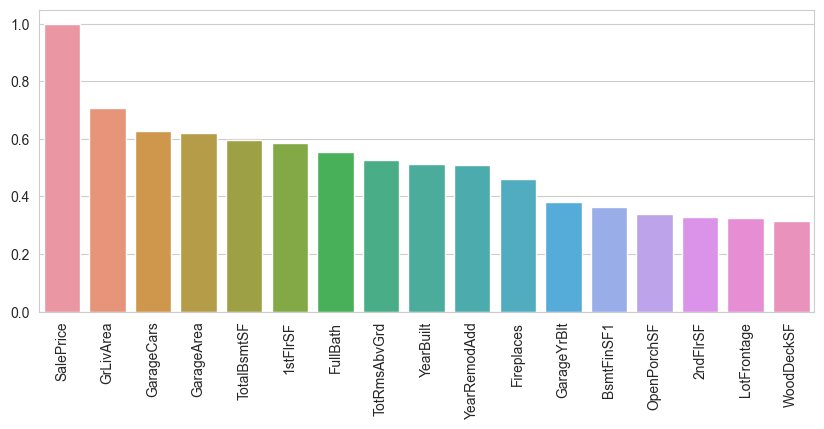

In [95]:
corr = abs(df.corr()["SalePrice"]).sort_values(ascending = False)
large_corr = corr[corr > 0.3]

plt.figure(figsize = (10, 4), dpi = 100)
sns.barplot(x = large_corr.index, y = large_corr.values)
plt.xticks(rotation = 90)
plt.show()


In [96]:
#to check the correlations of categorical column let us make a new dataframe with only categoircal
# columns and the target

df_categorical=df.select_dtypes(exclude ='int64') # select only object columns
df_categorical['SalePrice']= df['SalePrice'] # add target to the new df
df_categorical.sample()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
632,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,TA,TA,Y,No fence,None,5,2007,WD,Normal,285000


In [97]:
# example of finding correlation using point biserialr
#from scipy import stats
# a = np.array([0, 0, 0, 1, 1, 1, 1])
# b = np.arange(7)
# stats.pointbiserialr(a, b)


#### * As we are going to use dython nominal library to find the correlation before proceeding we have verified it once using point biserial function if the correlation values are accurately caluclated.
 * using street feature if have encoded it and found the correlation which matched the value in dython also.

In [98]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df['Street']=le.fit_transform(df['Street'])
# # from scipy.stats import pearsonr
# from scipy import stats
# a=df['Street']
# b=df['SalePrice']
# stats.pointbiserialr(a,b )

# output = PointbiserialrResult(correlation=0.044753456479166134, pvalue=0.12635792334327012)

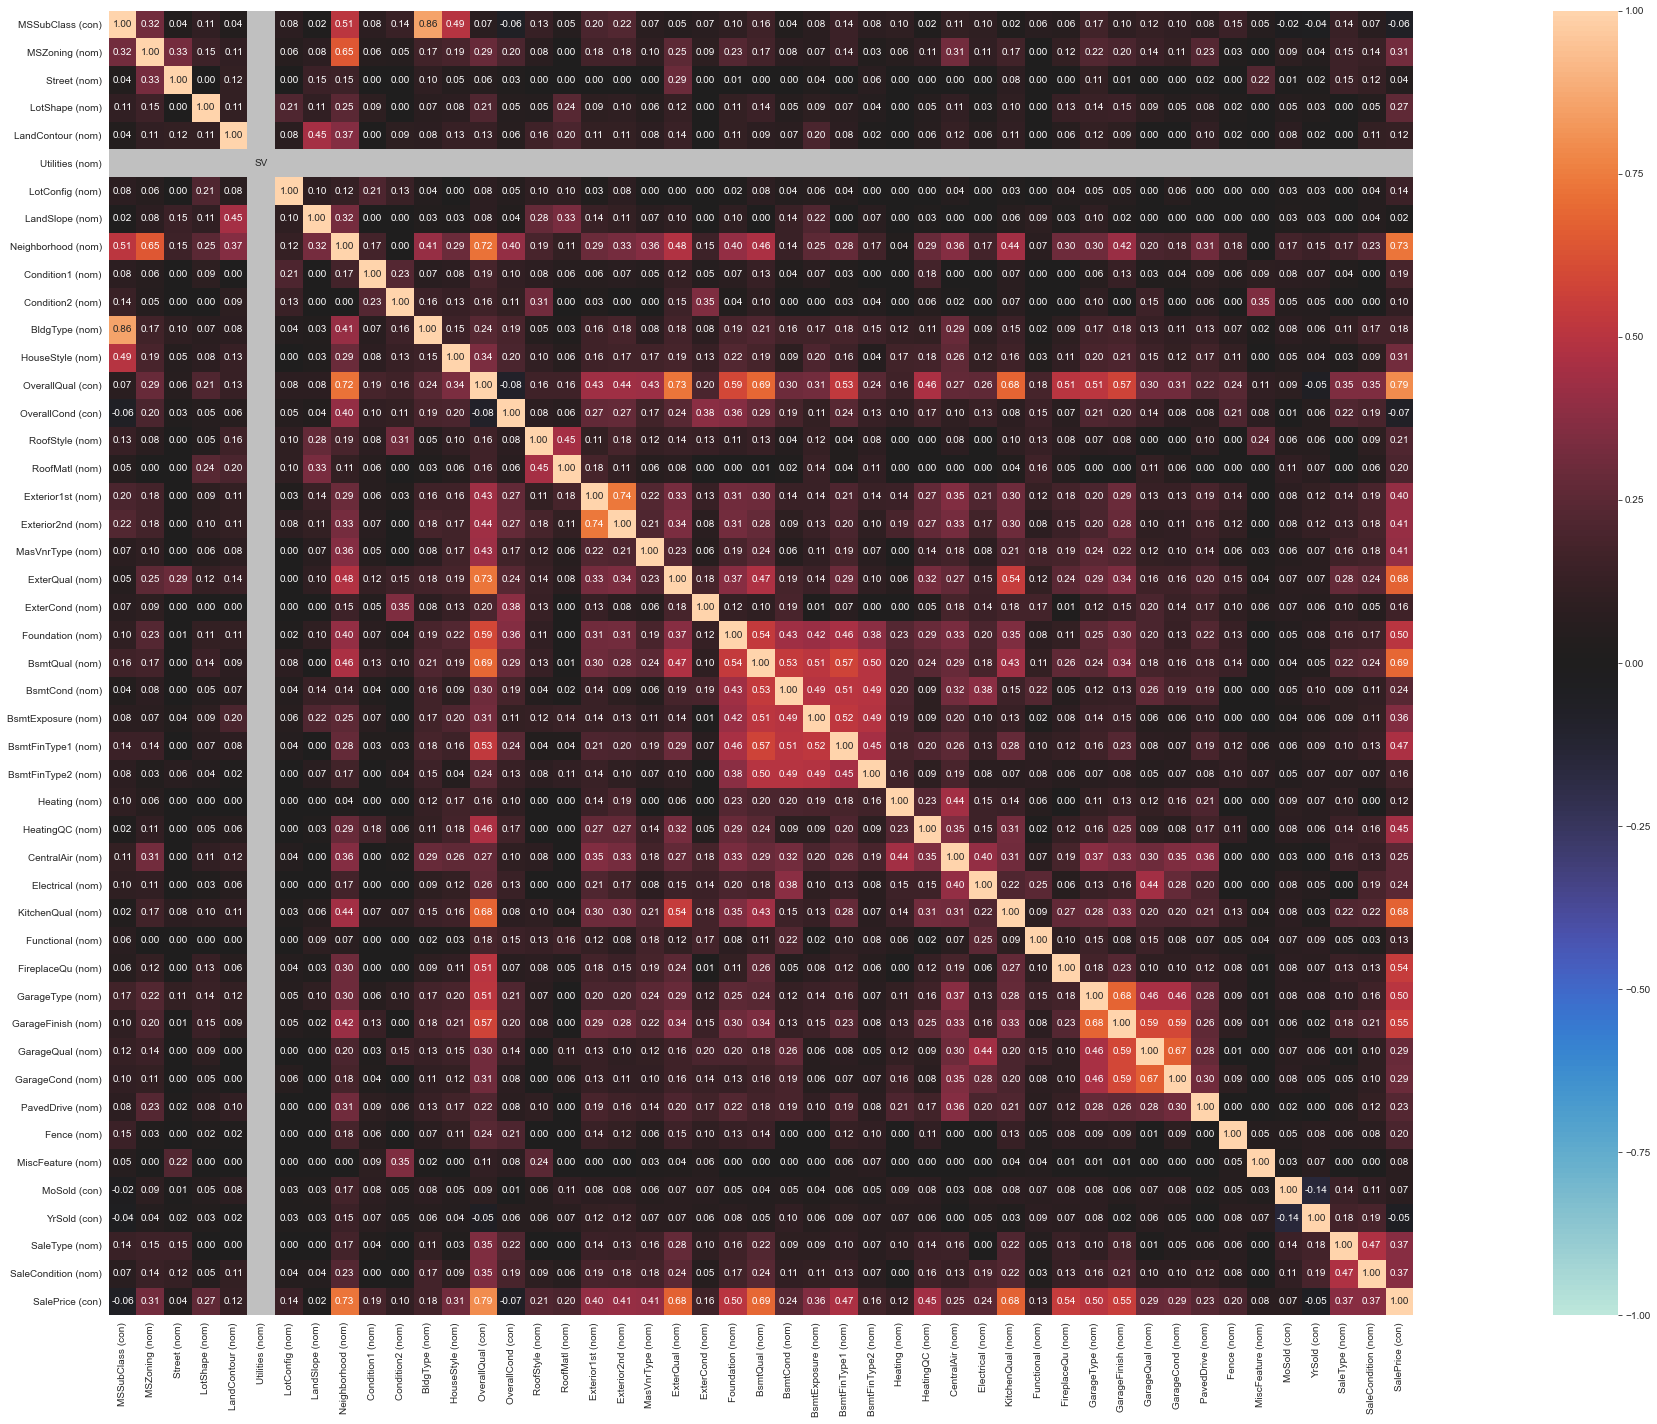

In [99]:
# finding correlation of all categorical variables with target column
#!pip install dython
from dython import nominal
nominal.associations(df_categorical,figsize=(50,24),mark_columns=True,fmt='0.2f')
plt.show()

####  Columns with high positive correlation with target
   * OverallQual(0.79)
   * Neighborhood(0.73)
   * BsmtQual(0.69)
   * KitchenQual(0.68)
   * ExterQual(0.68)
   * GarageFinish(0.55)
   * FireplaceQu(0.54)
   * GarageType(0.50)
   * Foundation(0.50)
    
* Columns with least correlation:
    * MSSubClass(-0.06)
    * Street (0.04)
    * Landslope(0.02)
    * MiscFeature(0.08)
    * MoSold(0.07)
    * YrSOld(-0.05)
    * OverallCond(-0.07)
    
* Columns with same correlation:

    * GarageQual and GarageCond (0.29)
    * SaleType and SaleCondition (0.37)
    * Exterior2nd and MsVnrType (0.41) Exterior1 (0.40)
    * Condition1 and Condition2 (0.19 and 0.10)
    

### Dropping the unnecessary features depending upon its correlation with the target and its predictive power.

#### Why have we selected the following columns to be dropped:
   * 'MSSubClass':Has a very small correlation with target (-0.06)
   * 'Street':Has a very small correlation with target (0.04)   
   * 'Uitlities' has only one unique value for all rows (All public Utilities (E,G,W,& S)	)  
   * 'LandSlope':low correlation (0.02)
   * 'Condition2':Condition1 and condition2 are almost same as condition1 as high correlation than condition2 drop condition2.
   * 'OverallCond': has low negative correlation -0.07  
   * 'YearBuilt': Original construction date and Remodel date (same as construction date if no remodeling or additions) has same correlation (0.51)so to keep one any of them let us keep renewed date and drop year built.
   * 'Exterior1st': exterior2 and exterior1st are almost same take one with high correlation i.e exterior2, drop exterior1.
   * 'BsmtFinSF2':low correlation (-0.01)
   * 'LowQualFinSF':has low negative correlation of -0.03
   * 'BsmtHalfBath':has low negative correlation of -0.01  
   * 'GarageArea':  area according to sq.ft and garage cars are giving same info lets keep cars as there are few outliers in the same and has high correlation.    
   * 'GarageCond': garage condition and 'GarageQual' both are giving same info (0.29) lets keep garage quality and drop 'GarageCond'.
   * 'MiscVal': has very low co-relation with the target (-0.01)
   * 'MiscFeature': has low correlation (0.08) and 1124 values are None which provide no significant information.
   *'SaleType', 'SaleCondition',  both have correlation of (0.37) sale condition is giving no great info lets keep sale type
   * '3SsnPorch':has a low corelation co-efficient of 0.06
   * 'PoolArea' have 1161 values as 0 and corr of (0.10)
   * 'EnclosedPorch', has low correlation of -0.12
   * 'ScreenPorch' has low correlation of 0.10 and too many outliers 
   * 'KitchenAbvGr' : correlation -0.13 and most of the values are 1



In [100]:
df.drop(columns =['MSSubClass','Street','Utilities','LandSlope','Condition2',
                'OverallCond', 'YearBuilt','Exterior1st','BsmtFinSF2',
                'LowQualFinSF', 'BsmtHalfBath','GarageArea','GarageCond',
                'MiscVal','MiscFeature','SaleCondition','3SsnPorch',
                'EnclosedPorch', 'ScreenPorch','PoolArea','KitchenAbvGr', 
                 ],axis=1,inplace=True)


In [101]:
df.shape

(1168, 56)

In [102]:
### detecting and reducing outliers using Z-score method

In [103]:
#select all numeric columns
df_numeric=df.select_dtypes(include='int64')

df_numeric.sample()

,LotFrontage,LotArea,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
858,56,20431,2006,1410,438,1848,1848,880,2728,1,2,1,4,10,2,2006,3,0,0,437154


In [104]:
from scipy.stats import zscore
z=np.abs(zscore(df_numeric))
z


array([[0.03599365, 0.62061571, 0.42156533, ..., 0.76290677, 2.38785016,
        0.67631017],
       [1.07854983, 0.60090318, 0.71035613, ..., 0.12058474, 2.41799216,
        1.09423443],
       [0.94480461, 0.06307504, 0.58920245, ..., 0.66447551, 1.25752521,
        1.11687211],
       ...,
       [2.08675364, 0.91636244, 0.42156533, ..., 0.07300534, 0.70170469,
        0.41705186],
       [0.92762843, 0.22167034, 1.67299211, ..., 0.76290677, 0.11212927,
        1.78922393],
       [0.03599365, 0.29303823, 0.87799325, ..., 0.03008339, 0.42862025,
        0.02179027]])

In [105]:
threshold=3
print(np.where(z>3))

(array([  23,   32,   32,   40,   51,   68,   78,   93,  103,  103,  103,
        103,  106,  113,  119,  119,  119,  119,  141,  141,  141,  141,
        141,  141,  141,  142,  151,  152,  191,  192,  192,  195,  211,
        211,  232,  232,  232,  241,  241,  241,  243,  245,  245,  259,
        273,  300,  303,  305,  305,  305,  305,  305,  309,  310,  325,
        356,  361,  361,  361,  361,  361,  361,  369,  378,  378,  380,
        381,  394,  394,  403,  423,  423,  441,  449,  452,  483,  483,
        483,  490,  495,  500,  504,  504,  504,  517,  517,  544,  561,
        561,  572,  574,  581,  592,  592,  592,  592,  592,  592,  592,
        592,  592,  592,  600,  600,  614,  614,  614,  622,  626,  626,
        626,  639,  644,  644,  664,  683,  689,  691,  691,  691,  691,
        691,  695,  695,  697,  707,  711,  713,  746,  757,  758,  762,
        762,  762,  770,  772,  775,  800,  804,  815,  821,  821,  833,
        839,  839,  839,  858,  863,  864,  888,  

In [106]:
df_new=df_numeric[(z<3).all(axis=1)]

In [107]:
print(df_numeric.shape,'\t\t', df_new.shape)

(1168, 20) 		 (1060, 20)


In [108]:
# percentage loss due to outliers:
((1168-1060)/1168*100)

9.246575342465754

#### As the zscore method is reducing 9% of the data we cannot go with zscore method instead try to reduce the outliers individually for each column .



### Treating outliers in ground living area


In [109]:
#finding the quantile in ground living area
print(df['GrLivArea'].quantile(0.10))
print(df['GrLivArea'].quantile(0.90))

912.0
2175.2999999999993


In [110]:
#replace the outliers value with 10th and 90th quantile
df['GrLivArea'] = np.where(df['GrLivArea'] <912.0, 912.0,df['GrLivArea'])
df['GrLivArea'] = np.where(df['GrLivArea'] >2175.29, 2175.29,df['GrLivArea'])


### 1stFlrSF

In [111]:
#finding the quantile
print(df['1stFlrSF'].quantile(0.10))
print(df['1stFlrSF'].quantile(0.95))


765.0
1836.199999999999


In [112]:
#replace the outliers value 95th quantile
df['1stFlrSF'] = np.where(df['1stFlrSF'] >1836.19, 1836.19,df['1stFlrSF'])


In [113]:
### LotFrontage

In [114]:
#finding the quantile
print(df['LotFrontage'].quantile(0.10))
print(df['LotFrontage'].quantile(0.98))


50.0
121.66000000000008


In [115]:
df['LotFrontage'] = np.where(df['LotFrontage'] <50.0, 50.0,df['LotFrontage'])
df['LotFrontage'] = np.where(df['LotFrontage'] >121.66, 121.66,df['LotFrontage'])

### BsmtUnSF


In [116]:
#finding the quantile
print(df['BsmtUnfSF'].quantile(0.10))
print(df['BsmtUnfSF'].quantile(0.95))


60.7
1468.0


In [117]:
#df['BsmtUnfSF'] = np.where(df['BsmtUnfSF'] <50.0, 50.0,df['BsmtUnfSF'])
df['BsmtUnfSF'] = np.where(df['BsmtUnfSF'] >1468.0, 1468.0,df['BsmtUnfSF'])

### TotalBsmtSF


In [118]:
#finding the quantile
print(df['TotalBsmtSF'].quantile(0.10))
print(df['TotalBsmtSF'].quantile(0.95))

641.9
1752.6499999999999


In [119]:
df['TotalBsmtSF'] = np.where(df['TotalBsmtSF'] >641, 641,df['TotalBsmtSF'])
df['TotalBsmtSF'] = np.where(df['TotalBsmtSF'] >1752.64, 1752.64,df['TotalBsmtSF'])

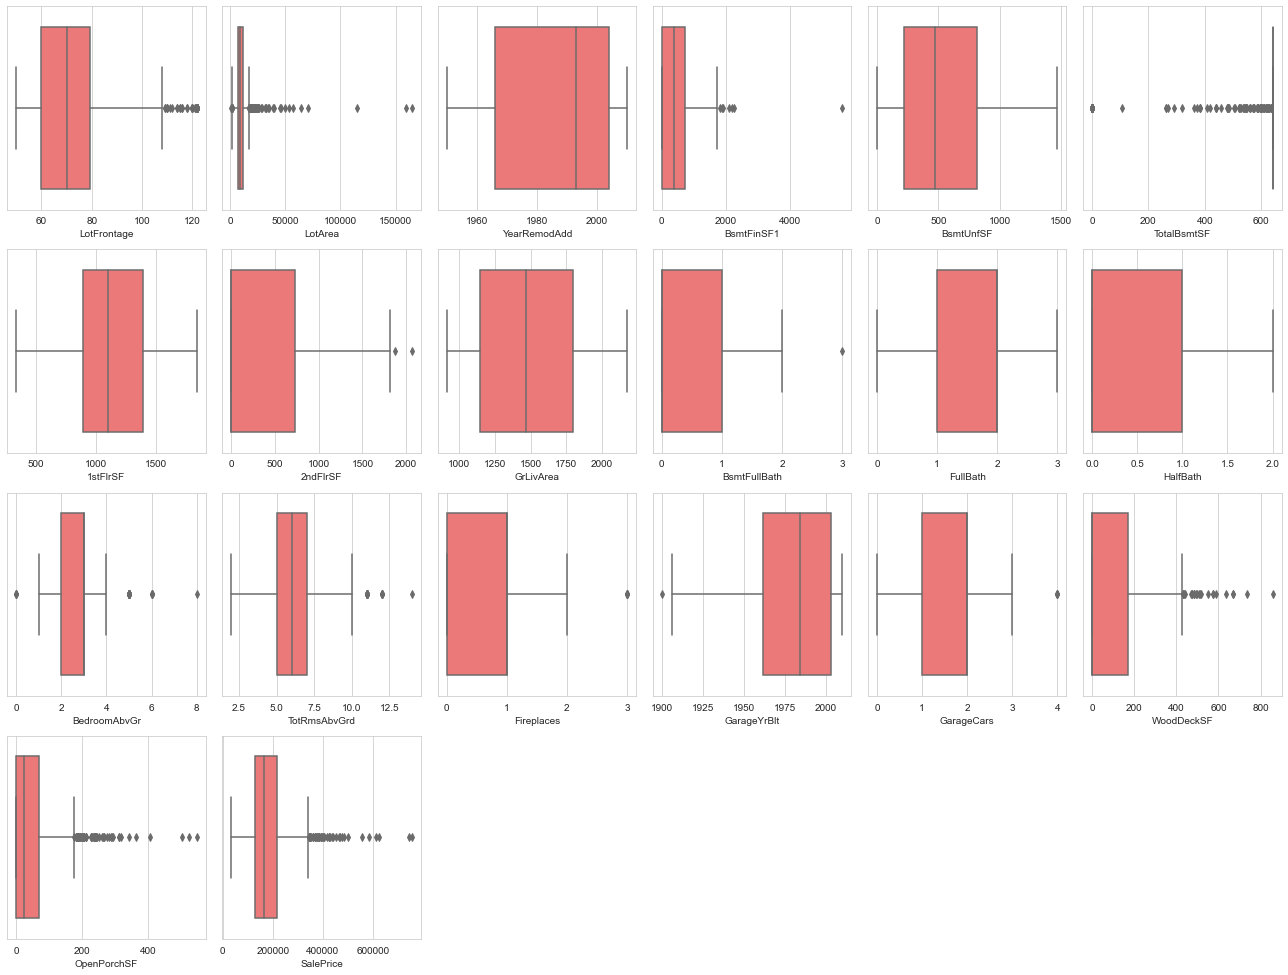

In [120]:
collist=df.describe().columns # select all the numeric columns
# # specify number of rows and columns for subplot
nrow=6
ncol=6
plt.figure(figsize=(18,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='#ff6666',orient='v')
    plt.tight_layout()
plt.show()


#### We have still kept a few outliers which shall amount to about 5% because our data describes a real estate charateristics which can be actually realistic so dropping them would not be a good choice .For an example properties with 4 and above bedrooms can always be a possibility although being an outlier. 

### Model Building

In [121]:
df1=df.select_dtypes(exclude='int64')

In [122]:
#transform nonnumeric columns to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df1.columns:
    df[i]=le.fit_transform(df1[i])

df.sample()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SalePrice
412,1,34,10207,3,3,4,21,2,0,5,...,2,5,2,144,105,4,7,1,6,227875


In [123]:
#assigning features to x
x=df.drop(["SalePrice"],axis=1)
x.sample()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType
203,3,20,7763,3,3,4,12,2,0,2,...,3,2,5,2,0,0,4,9,2,8


In [124]:
x.skew()

MSZoning        -1.796785
LotFrontage      0.947520
LotArea         10.659285
LotShape        -0.603775
LandContour     -3.125982
LotConfig       -1.118821
Neighborhood     0.043735
Condition1       3.008289
BldgType         2.318657
HouseStyle       0.285680
OverallQual      0.175082
YearRemodAdd    -0.495864
RoofStyle        1.498560
RoofMatl         7.577352
Exterior2nd     -0.592349
MasVnrType      -0.104609
ExterQual       -1.810843
ExterCond       -2.516219
Foundation      -0.002761
BsmtQual        -0.487530
BsmtCond        -2.816444
BsmtExposure    -1.075098
BsmtFinType1     0.100811
BsmtFinSF1       1.871606
BsmtFinType2    -3.144813
BsmtUnfSF        0.181439
TotalBsmtSF     -3.654180
Heating         10.103609
HeatingQC        0.449933
CentralAir      -3.475188
Electrical      -3.104209
1stFlrSF         0.233457
2ndFlrSF         0.823479
GrLivArea        0.112232
BsmtFullBath     0.627106
FullBath         0.057809
HalfBath         0.656492
BedroomAbvGr     0.243855
KitchenQual 

In [125]:
# power transformation to reduce the skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [126]:
y=df["SalePrice"]
y.sample()

616    140000
Name: SalePrice, dtype: int64

#### Finding best random state


In [127]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    cscore=cross_val_score(mod,x,y,cv=3).mean()
    
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate),'with cross validation=',(cscore*100))


Best accuracy is  85.5894675118308 found on random state 195 with cross validation= 80.08587947602017


In [128]:
#using the best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=195)

In [129]:
#importing libraries for model building
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor

### checking for various algorithms using loop


In [130]:
models=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
        Ridge(),ElasticNet(),RandomForestRegressor()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("for",i,"algorithm")
    print(f"r2 score is",(r2_score(y_test,pred_y)*100))
    cross_score=cross_val_score(i,x,y,cv=3).mean()*100
    print("cross validation score is",cross_score)
    print('\n')

for LinearRegression() algorithm
r2 score is 85.5894675118308
cross validation score is 80.08587947602017


for DecisionTreeRegressor() algorithm
r2 score is 63.43363594825162
cross validation score is 73.70404495469379


for KNeighborsRegressor() algorithm
r2 score is 80.27373530061948
cross validation score is 74.34593946864054


for Lasso() algorithm
r2 score is 85.5896464202609
cross validation score is 80.08623191651476


for Ridge() algorithm
r2 score is 85.58274343433186
cross validation score is 80.0938722331431


for ElasticNet() algorithm
r2 score is 83.79990774739882
cross validation score is 78.68142849094151


for RandomForestRegressor() algorithm
r2 score is 88.55110891900215
cross validation score is 86.47157191434096




### Linear regressor

In [131]:
Lr=LinearRegression(fit_intercept=True, normalize=False,n_jobs=None,positive=False)
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
r2_lr=r2_score(y_test,y_pred)*100
print("r2 score=",r2_lr)
cv_lr=cross_val_score(Lr,x,y,cv=3).mean()*100
print("cross validation score is",cv_lr)
print("mean absolute error=",mean_absolute_error(y_test,y_pred))
mse_lr=mean_squared_error(y_test,y_pred)
print("mean squared error=",mse_lr)
rmse_lr=np.sqrt(mse_lr)
print("root mean squared error=",rmse_lr)


r2 score= 85.5894675118308
cross validation score is 80.08587947602017
mean absolute error= 21708.51989781894
mean squared error= 809661876.7317346
root mean squared error= 28454.558101150236


### decision tree  Regression

In [132]:
#hypertuning decision tree regressor
from sklearn.model_selection import GridSearchCV
dc=DecisionTreeRegressor()

parameters={"criterion":["mse","mae",'friedman_mse'],'splitter':["best",'random'],
            "min_samples_leaf":[2,4,6,8],
           "max_features" :["auto", "sqrt", "log2"]}
abc=GridSearchCV(dc,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 2, 'splitter': 'best'}


In [133]:
dc=DecisionTreeRegressor(criterion='mse', max_features='auto',min_samples_leaf=2,
                        splitter='best')
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)
r2_dc=r2_score(y_test,y_pred)*100
print("r2 score=",r2_dc)
cv_dc=cross_val_score(dc,x,y,cv=3).mean()*100
print("cross validation score is",cv_dc)
print("mean absolute error=",mean_absolute_error(y_test,y_pred))
mse_dc=mean_squared_error(y_test,y_pred)
print("mean squared error=",mse_dc)
rmse_dc=np.sqrt(mse_dc)
print("root mean squared error=",rmse_dc)

r2 score= 64.0257264652419
cross validation score is 73.1344146715489
mean absolute error= 28896.900114155247
mean squared error= 2021229808.692066
root mean squared error= 44958.08946888275


### KNN

In [134]:
#hypertuning knn
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()

parameters={"n_neighbors":[11,23,31,50],"algorithm":["auto",'ball_tree','kd_tree','brute'],
           "weights" :["uniform", "distance"]}
abc=GridSearchCV(knn,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}


In [135]:
knn=KNeighborsRegressor(algorithm='auto',n_neighbors=11,weights='distance')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
r2_knn=r2_score(y_test,y_pred)*100
print("r2 score=",r2_knn)
cv_knn=cross_val_score(knn,x,y,cv=3).mean()*100
print("cross validation score is",cv_knn)
print("mean absolute error=",mean_absolute_error(y_test,y_pred))
mse_knn=mean_squared_error(y_test,y_pred)
print("mean squared error=",mse_knn)
rmse_knn=np.sqrt(mse_knn)
print("root mean squared error=",rmse_knn)

r2 score= 80.3089039515553
cross validation score is 75.63765061799896
mean absolute error= 22185.182636266407
mean squared error= 1106352578.8916981
root mean squared error= 33261.878763709334


### Hypertuning for random forest regression

In [136]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()

parameters={"criterion":["mse","mae"],"min_samples_leaf":[2,4,6,8],
           "max_features" :["auto", "sqrt", "log2"]}
abc=GridSearchCV(rf,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_leaf': 2}


In [137]:
#using the parameters obtained above
rf=RandomForestRegressor(criterion='mse',max_features='sqrt',min_samples_leaf=2)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2_rf=r2_score(y_test,y_pred)*100
print("r2 score=",r2_rf)
cv_rf=cross_val_score(rf,x,y,cv=3).mean()*100
print("cross validation score is",cv_rf)
print("mean absolute error=",mean_absolute_error(y_test,y_pred))
mse_rf=mean_squared_error(y_test,y_pred)
print("mean squared error=",mse_rf)
rmse_rf=np.sqrt(mse_rf)
print("root mean squared error=",rmse_rf)

r2 score= 88.47672625773646
cross validation score is 85.10617197502054
mean absolute error= 17090.358375781656
mean squared error= 647440020.1321051
root mean squared error= 25444.842702050744


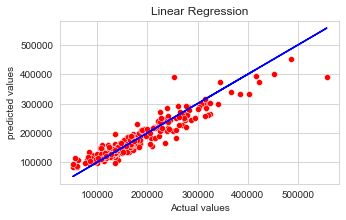

In [138]:
### Best fit line

plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.title("Linear Regression")
plt.show()


### Comparison table:

In [139]:
#creating a comparision table for better understanding

data=pd.DataFrame({
    "Model":['Linear regression',"RandomForest regressor","Decision Tree regressor","KNN regressor"],
    "r2 Score":[r2_lr,r2_rf,r2_dc,r2_knn],
    "Cross Validation score":[cv_lr,cv_rf,cv_dc,cv_knn],
    "RMSE":[rmse_lr,rmse_rf,rmse_dc,rmse_knn]
})

data.sort_values(by="r2 Score",ascending=False)

,Model,r2 Score,Cross Validation score,RMSE
1,RandomForest regressor,88.476726,85.106172,25444.842702
0,Linear regression,85.589468,80.085879,28454.558101
3,KNN regressor,80.308904,75.637651,33261.878764
2,Decision Tree regressor,64.025726,73.134415,44958.089469


#### Thus from all the algorithms random forest can be seen working well with our data hence we shall save random forest as our final model.

### Saving the predictions


In [140]:
#check the model
rf

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2)

In [141]:
#actual values
a=np.array(y_test)

In [142]:
#predicted
predicted=np.array(rf.predict(x_test))

In [143]:
#create dataframe to save predictions and actual values
import pandas as pd
df_mod=pd.DataFrame({'original':a,'predicted':predicted})
df_mod

,original,predicted
0,415298,392279.068095
1,137000,133883.465476
2,222500,229803.539444
3,177500,170682.309349
4,280000,289527.523452
...,...,...
287,228500,216976.630516
288,115000,133015.170449
289,117000,120838.247405
290,124000,150705.943738


In [144]:
# save the predictions as csv file
df_mod.to_csv("comparison.csv")

In [145]:
#save the model
import pickle
filename="Housing-price.pkl"
pickle.dump(rf,open(filename,'wb'))

### Test dataset

#### We shall follow the same pipeline process that is used on train data.

In [146]:
#importing the test data into notebook
df_test=pd.read_csv("test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [147]:
#Let us drop the "Id" column as it is unique for all.
df_test.drop(columns=['Id'],axis=1,inplace=True)
df_test.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
63,120,RM,36.0,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal


In [148]:
#dropping the alley column
df_test.drop(columns=['Alley'],axis=1,inplace=True)
df_test.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
277,70,RM,60.0,6600,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,NaN,0,12,2009,WD,Normal


In [149]:
#dropping the poolqc column
df_test.drop(columns=['PoolQC'],axis=1,inplace=True)
df_test.sample()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
116,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,NaN,0,1,2010,WD,Abnorml


In [150]:
#replacing the nan values with median 
impute = SimpleImputer(missing_values=np.nan, strategy='median')
df_test['LotFrontage']=impute.fit_transform((df_test['LotFrontage'].values.reshape(-1, 1)))

df_test['LotFrontage'].isnull().sum()


0

In [151]:
#instantiate simple impute and use mode/most frequent method
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_test['GarageYrBlt']=imp.fit_transform((df_test['GarageYrBlt'].values.reshape(-1, 1)))


In [152]:
#check if the null values are replaced:
df_test['GarageYrBlt'].isnull().sum()

0

In [153]:
df_test.drop(columns=['MasVnrArea'],axis=1,inplace=True)
df_test.sample()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
56,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,NaN,0,6,2008,WD,Normal


In [154]:
df_test['MasVnrType']=df_test['MasVnrType'].fillna('None')
df_test['BsmtQual']=df_test['BsmtQual'].fillna('No Basement')
df_test['BsmtCond']=df_test['BsmtCond'].fillna('No Basement')
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna('No Basement')
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna('No Basement')
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna('No Basement')
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna('No Fire place')
df_test['GarageType']=df_test['GarageType'].fillna('No garage')
df_test['GarageFinish']=df_test['GarageFinish'].fillna('No garage')
df_test['GarageQual']=df_test['GarageQual'].fillna('No garage')
df_test['GarageCond']=df_test['GarageCond'].fillna('No garage')
df_test['Fence']=df_test['Fence'].fillna('No fence')
df_test['MiscFeature']=df_test['MiscFeature'].fillna('None')


In [155]:
#instantiate simple impute and use mode/most frequent method
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_test['Electrical']=imp.fit_transform((df_test['Electrical'].values.reshape(-1, 1)))

In [156]:
#check if there are any null values in the dataset
df_test.isnull().any().sum()

0

### DataType Conversions:

In [157]:
#converting float columns into integer datatype
df_test['GarageYrBlt']=df_test['GarageYrBlt'].astype('int64')
df_test['LotFrontage']=df_test['LotFrontage'].astype('int64')

df_test['MoSold']=df_test['MoSold'].astype('object')
df_test['YrSold']=df_test['YrSold'].astype('object')
df_test['MSSubClass']=df_test['MSSubClass'].astype('object')
df_test['OverallQual']=df_test['OverallQual'].astype('object')
df_test['OverallCond']=df_test['OverallCond'].astype('object')

#### Dropping the unnecessary features depending upon its correlation with the target and its predictive power.


In [158]:
df_test.drop(columns =['MSSubClass','Street','Utilities','LandSlope','Condition2',
                        'OverallCond', 'YearBuilt','Exterior1st','BsmtFinSF2',
                        'LowQualFinSF', 'BsmtHalfBath','GarageArea','GarageCond',
                        'MiscVal','MiscFeature','SaleCondition','EnclosedPorch','ScreenPorch',
                       '3SsnPorch','PoolArea','KitchenAbvGr'],axis=1,inplace=True)

In [159]:
df_test.shape

(292, 55)

In [160]:
df_test_objects=df_test.select_dtypes(exclude='int64')

In [161]:
#transform nonnumeric columns to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_test_objects.columns:
    df_test[i]=le.fit_transform(df_test_objects[i])

In [162]:
from sklearn.preprocessing import power_transform
df_test=power_transform(df_test,method='yeo-johnson')

In [163]:
#load the saved model
saved_model=pickle.load(open("Housing-price.pkl",'rb'))
saved_model

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2)

In [164]:
# use the saved model to make predictions
predictions=saved_model.predict(df_test)
predictions


array([323288.16604762, 204345.3562619 , 275436.04333333, 175703.33428571,
       234439.30739286,  96198.09802381, 141820.08846032, 316153.82807143,
       235145.73472222, 169330.78507937,  89621.00568543, 148439.23      ,
       123064.54538889, 187388.31866667, 301935.64088095, 127078.26187729,
       117134.76428571, 124739.33015152, 166893.82729365, 194433.38654762,
       147633.82531746, 151226.29928571, 154259.34761905, 107989.52319048,
       105053.82702381, 129758.32035714, 174893.26633333, 148104.59093651,
       168511.85166667, 118670.84357143, 138608.68966667, 196290.85021062,
       236525.34180159, 160840.37833333, 118730.26103358, 173560.9574127 ,
       198024.7739127 , 122031.21035714, 162736.2831746 , 149481.79666667,
       107295.10239177, 301595.99464719, 211815.88049062, 189337.55008075,
       136214.80845455, 123596.78952381, 126987.72436508, 104551.97285714,
       213060.72829365, 330035.7510119 , 143899.29821429, 191455.13195238,
       100031.35196032,  

In [165]:
#save the preidctions in dataframe
prediction_df=pd.DataFrame(predictions)
prediction_df

,0
0,323288.166048
1,204345.356262
2,275436.043333
3,175703.334286
4,234439.307393
...,...
287,236761.493651
288,139394.956071
289,146559.582000
290,149741.140952


### Conclusion:
    
* Mean Squared Error computes the difference between the mean squared of the predicted values and the actual values; Root Mean Square Error computes the square root of the Mean Squared Error.

* RMSE 	is applied to all the four algorithms. R squared or the coefficient of determination is the measure of the closeness of predicted data with the actual data. 

* With all the comparison metrics, it is observed that Random Forest Regression shows the least Root Mean Square Error with a value of 25552.9797. Therefore, there are fewer errors in this metric as compared to others. Along with this, the R-Squared  score is 0.883786, which is 88.37% for Random forest Regression.

* Mean Squared Error is also lowest for the Random Forest Regression algorithm with the value of 652952128.330. 

* The other evaluation metric used, Mean absolute Error also gives the least value with Random Forest.

* Apart from Random Forest Regression, Linear Regression also showed satisfactory results with R-Squared score for the same as 0.8558, or 	85.58%. The predictions, however, were not very good.
* Real estate prices vary due to a wide variety of attributes. The machine learning-based model is a substantial and feasible way to forecast real estate prices, and can provide relatively competitive and satisfactory results.

* We have cut down the features from 80 to 56 with the help of inferences from visualizations and EDA performed which reduces the redundancy and has helped built a better model. There is a scope to reduce the number of features too but we have limited it to 55 so that the prediction prices are dependent on more than just few factors which shall be helpful in future.

* Features that greatly contribute to house price predictions were  locality (neighbourhood) ,above grade living area ,parking capacity of the properties, Basement area and area above grade, facilities like electricity, water, gas septic tanks, fire place, number of full and half baths, the year of construction, Overall quality of	the house including exterior and material quality.

* Few features like MS Zone, Miscellaneous features, land slope, month in which property was sold, and etc. did not make any significant impact on the prediction of sale prices.

* Thus Machine learning models, including linear regression, KNN regression, 	decision tree regression and random forest regression, were used in this investigation to forecast house prices.


# =========================THANKYOU============================